# IRIS: Exploring Performance Scaling of the Intelligent Runtime System and its Dynamic Scheduling Policies

In [14]:
%load_ext rpy2.ipython

#dependencies installed with:
#install.packages("ggplot2")
#install.packages("latex2exp")
#install.packages("remotes")
#remotes::install_github("zeehio/facetscales")
#conda install -c conda-forge r-magick
#conda install udunits2
#conda install gdal
#install.packages('magick')
#remotes::install_github("coolbutuseless/ggpattern")

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Accessing Artefact Data

IRIS is available publicly here: [https://github.com/ORNL/iris](https://github.com/ORNL/iris) and these results were generated at the 3.0 snapshot/release.

Since our Experimental Computing Lab ([ExCL](https://www.excl.ornl.gov/)) is constantly changing systems we have stored the generated results in the associated tarballs. If you unpack `dagger.tar` into the `apps/dagger` subdirectory, and `benchmarking.tar` into the `apps/benchmarking` subdirectories all codes stored in this Jupyter notebook should be reproducible. This notebook should also be located in the `apps/dagger` directory.

### Collecting New Data

The Baseline latency and throughput of issuing different amounts of tasks is collected over our various systems.
The script to do the whole aquisition from `run-throughput-dgemm-on-all-platforms.sh` and `run-latency-klo-on-all-platforms.sh` located in the `apps/benchmarking` subdirectory.
Run this from the headnode and it will `ssh` into the correct host then run the benchmark applications.
The data is stored as `csv` files in the `apps/benchmarking/<latency/throughput>-results` subdirectory respectively.

### Loading the Data

Loading the data and generating the figures is done from the `apps/dagger` subdirectory.


In [134]:
import glob
application_files = glob.glob("../benchmarking/task-latency-results/kernellaunch-*.csv")

import pandas
df = None

for af in application_files:
    names = af.replace(".csv","")
    names = names.replace('../benchmarking/task-latency-results/',"")
    params = names.split("-")
    params.pop(0)
    num_launches = int(params.pop())
    system = params.pop()
    version = '-'.join([str(x) for x in params])
    builton = None
    if "opencl" in version:
        builton = "OpenCL"
    elif "cuda" in version:
        builton = "CUDA"
    else:
        builton = "HIP"
    runtime = None
    if len(params) == 1:
        runtime = "native"
    elif params[0] == "multigpu":
        runtime = "multigpu"
    else:
        runtime = "iris"
    ndf = pandas.DataFrame({'runtimes':pandas.read_csv(af,header=None,comment='#').values[0].tolist(),'num_launches':num_launches,'version':version,'system':system,'runtime':runtime,'builton':builton})
    if df is None:
        df = ndf
    else:
        df = pandas.merge(df,ndf,how='outer')

print(df)
kernellaunch = df

        runtimes  num_launches version   system runtime builton
0       425.8160            10  opencl   Radeon  native  OpenCL
1       120.6400            10  opencl   Radeon  native  OpenCL
2        58.6510            10  opencl   Radeon  native  OpenCL
3        82.7312            10  opencl   Radeon  native  OpenCL
4        82.7312            10  opencl   Radeon  native  OpenCL
...          ...           ...     ...      ...     ...     ...
143995   17.8814             1    cuda  Leconte  native    CUDA
143996   17.8814             1    cuda  Leconte  native    CUDA
143997   20.5040             1    cuda  Leconte  native    CUDA
143998   20.2656             1    cuda  Leconte  native    CUDA
143999   19.5503             1    cuda  Leconte  native    CUDA

[144000 rows x 6 columns]


In [135]:
kernellaunch

runtimes  num_launches version   system runtime builton
0       425.8160            10  opencl   Radeon  native  OpenCL
1       120.6400            10  opencl   Radeon  native  OpenCL
2        58.6510            10  opencl   Radeon  native  OpenCL
3        82.7312            10  opencl   Radeon  native  OpenCL
4        82.7312            10  opencl   Radeon  native  OpenCL
...          ...           ...     ...      ...     ...     ...
143995   17.8814             1    cuda  Leconte  native    CUDA
143996   17.8814             1    cuda  Leconte  native    CUDA
143997   20.5040             1    cuda  Leconte  native    CUDA
143998   20.2656             1    cuda  Leconte  native    CUDA
143999   19.5503             1    cuda  Leconte  native    CUDA

[144000 rows x 6 columns]

In [102]:
import glob
application_files = glob.glob("../benchmarking/compute-performance-results/dgemm-*.csv")

import pandas
df = None

for af in application_files:
    names = af.replace(".csv","")
    names = names.replace('../benchmarking/compute-performance-results/',"")
    params = names.split("-")
    params.pop(0)
    num_devices = params.pop()
    system = params.pop()
    version = '-'.join([str(x) for x in params])
    runtime = None
    if len(params) == 1:
        runtime = "native"
    elif params[0] == "multigpu":
        runtime = "multigpu"
    else:
        runtime = "iris"
    ops = pandas.read_csv(af,header=None,comment='#')[0].tolist()
    iops = pandas.read_csv(af,header=None,comment='#')[1].tolist()
    flops = pandas.read_csv(af,header=None,comment='#')[2].tolist()
    tflops = pandas.read_csv(af,header=None,comment='#')[3].tolist()

    ndf = pandas.DataFrame({'GOPS':ops,'GIOPS':iops,'GFLOPS':flops,'TFLOPS':tflops,'version':version,'system':system,'runtime':runtime,'num_devices':num_devices})
    if df is None:
        df = ndf
    else:
        df = pandas.merge(df,ndf,how='outer')

print(df)
throughput = df

            GOPS      GIOPS     GFLOPS    TFLOPS      version    system  \
0      79.878675  53.252450  26.626225  0.027305  iris-opencl   equinox   
1      82.979430  55.319620  27.659810  0.028284  iris-opencl   equinox   
2      83.131228  55.420819  27.710409  0.028226  iris-opencl   equinox   
3      82.966691  55.311127  27.655564  0.028209  iris-opencl   equinox   
4      83.241090  55.494060  27.747030  0.028291  iris-opencl   equinox   
...          ...        ...        ...       ...          ...       ...   
10664  40.557945  27.038630  13.519315  0.010166  iris-opencl  explorer   
10665  40.552079  27.034719  13.517360  0.005775  iris-opencl  explorer   
10666  40.542451  27.028300  13.514150  0.013543  iris-opencl  explorer   
10667  40.593847  27.062565  13.531282  0.010130  iris-opencl  explorer   
10668  40.609417  27.072945  13.536472  0.005766  iris-opencl  explorer   

      runtime num_devices  
0        iris           1  
1        iris           1  
2        iris  

In [185]:
import glob
application_files = glob.glob("../benchmarking/memory-performance-results/*.csv")
#discard the csv files where are the timeline of task and device it was run, instead we only consider the aggregate summation time logs.
#application_files =  [i for i in application_files if i.count('-') == 6]

import pandas
df = None

for af in application_files:
    names = af.replace(".csv","")
    names = names.replace('../benchmarking/memory-performance-results/',"")
    params = names.split("-")
    params.pop(0)
    length = 100 #params.pop()
    KiB = params.pop()
    system = params.pop()
    version = params.pop()
    with open(af, encoding="utf-8") as file:
        content = [l.rstrip("\n") for l in file]
    times = content[0].split(',')
    times = [float(ele) for ele in times]
    ndf = pandas.DataFrame({'ms':times,'system':system,'version':version,'chain_length':length,'KiB':KiB})
    if df is None:
        df = ndf
    else:
        df = pandas.merge(df,ndf,how='outer')
print(df)
transfer_size = df

              ms    system version  chain_length       KiB
0        3.31640  explorer     hip           100      1024
1        2.28691  explorer     hip           100      1024
2        2.02465  explorer     hip           100      1024
3        1.98483  explorer     hip           100      1024
4        1.91069  explorer     hip           100      1024
...          ...       ...     ...           ...       ...
40776  283.46800   leconte    cuda           100  16777216
40777  283.36300   leconte    cuda           100  16777216
40778  283.65300   leconte    cuda           100  16777216
40779  285.56500   leconte    cuda           100  16777216
40780  283.50200   leconte    cuda           100  16777216

[40781 rows x 5 columns]


# Latency

The variance in latency is significantly higher on CUDA runtimes (both natively and through IRIS) and only matches the latency of OpenCL and HIP based runtimes when amortized over > 100 concurrent kernel launches. It is interesting that there is such large variability for small/few kernel runs just using the CUDA runtime, whereas the same devices with the OpenCL runtime have a more consistant performance---with a smaller spread of times. The following is a comparison broken down per system to verify this observation.

Let's present this data as a barchart rather than a box-and-whisker plot.

And on a landscape layout with ordering of the systems

In general, we see a higher variability in performance when adding IRIS to greater number of kernel launches regardless of backend/runtime used, particularly for ~1000 kernel launches. This could identify an area of improvement for IRIS---scalability on larger workloads which require many kernel tasks to complete.

When considering just the median task latency on each system, we see that native performance is better than when IRIS is added, however once we use IRIS the multigpu version generally performs almost as well as native runtimes. Of course, the abstraction that IRIS offers and once smart scheduling stategies can be employed we postulate that this will amortize the added per task latency in execution---which is the only downside to using IRIS.

It is consistant that more tasks to process will take longer to complete and we generally see this on all systems and all versions.
OpenCL performs as well as the CUDA and HIP versions and is comparable over the increasing number of kernel launches.

The systems have been arranged from fewest devices to most devices per row; the Nvidia systems on the top, and AMD GPUs on the bottom.

| System | GPU Vendor | GPU Series | # of GPUs | Runtimes |
| :-     | :-         | :-  | :-       | :-:      |
| Oswald00 | Nvidia | P100 | 1 | CUDA |
|  | |  |  | OpenCL |
| Equinox | Nvidia | V100 | 4 | CUDA |
|  | |  |  | OpenCL |
| Leconte | Nvidia | V100 | 6 | CUDA |
| Radeon | AMD | Vega20 | 1 | HIP |
|  | |  |  | OpenCL |
| Explorer | AMD | M160 | 2 | HIP |
|  | |  |  | OpenCL |

So we can compare the latency involved in executing tasks over an increasing number of devices; 1->3->6 Nvidia GPUs on the top, and 1->2 AMD GPUs on the bottom.

Comparing the scaling of Oswald (1xP100) to Equinox (3xV100) we see no significant difference in scaling dispite being a different generation of GPU, and is irrespective of whether CUDA or OpenCL is used in the backend.

The Explorer (6xV100) **TODO**: Investigate why this system is orders of magnitude worse than the other systems.

Without the Leconte results a closer comparison can be made.


[1] "cuda"                 "hip"                  "iris-cuda"           
[4] "iris-hip"             "iris-opencl"          "multigpu-iris-cuda"  
[7] "multigpu-iris-hip"    "multigpu-iris-opencl" "opencl"              
[1] Radeon   Zenith   Explorer Oswald   Equinox  Leconte 
Levels: Oswald Equinox Leconte Radeon Explorer Zenith
[1] "Unique kernellaunch runtimes:"
[1] Native IRIS  
Levels: Native IRIS
`summarise()` has grouped output by 'num_launches', 'system', 'version',
'runtime'. You can override using the `.groups` argument.


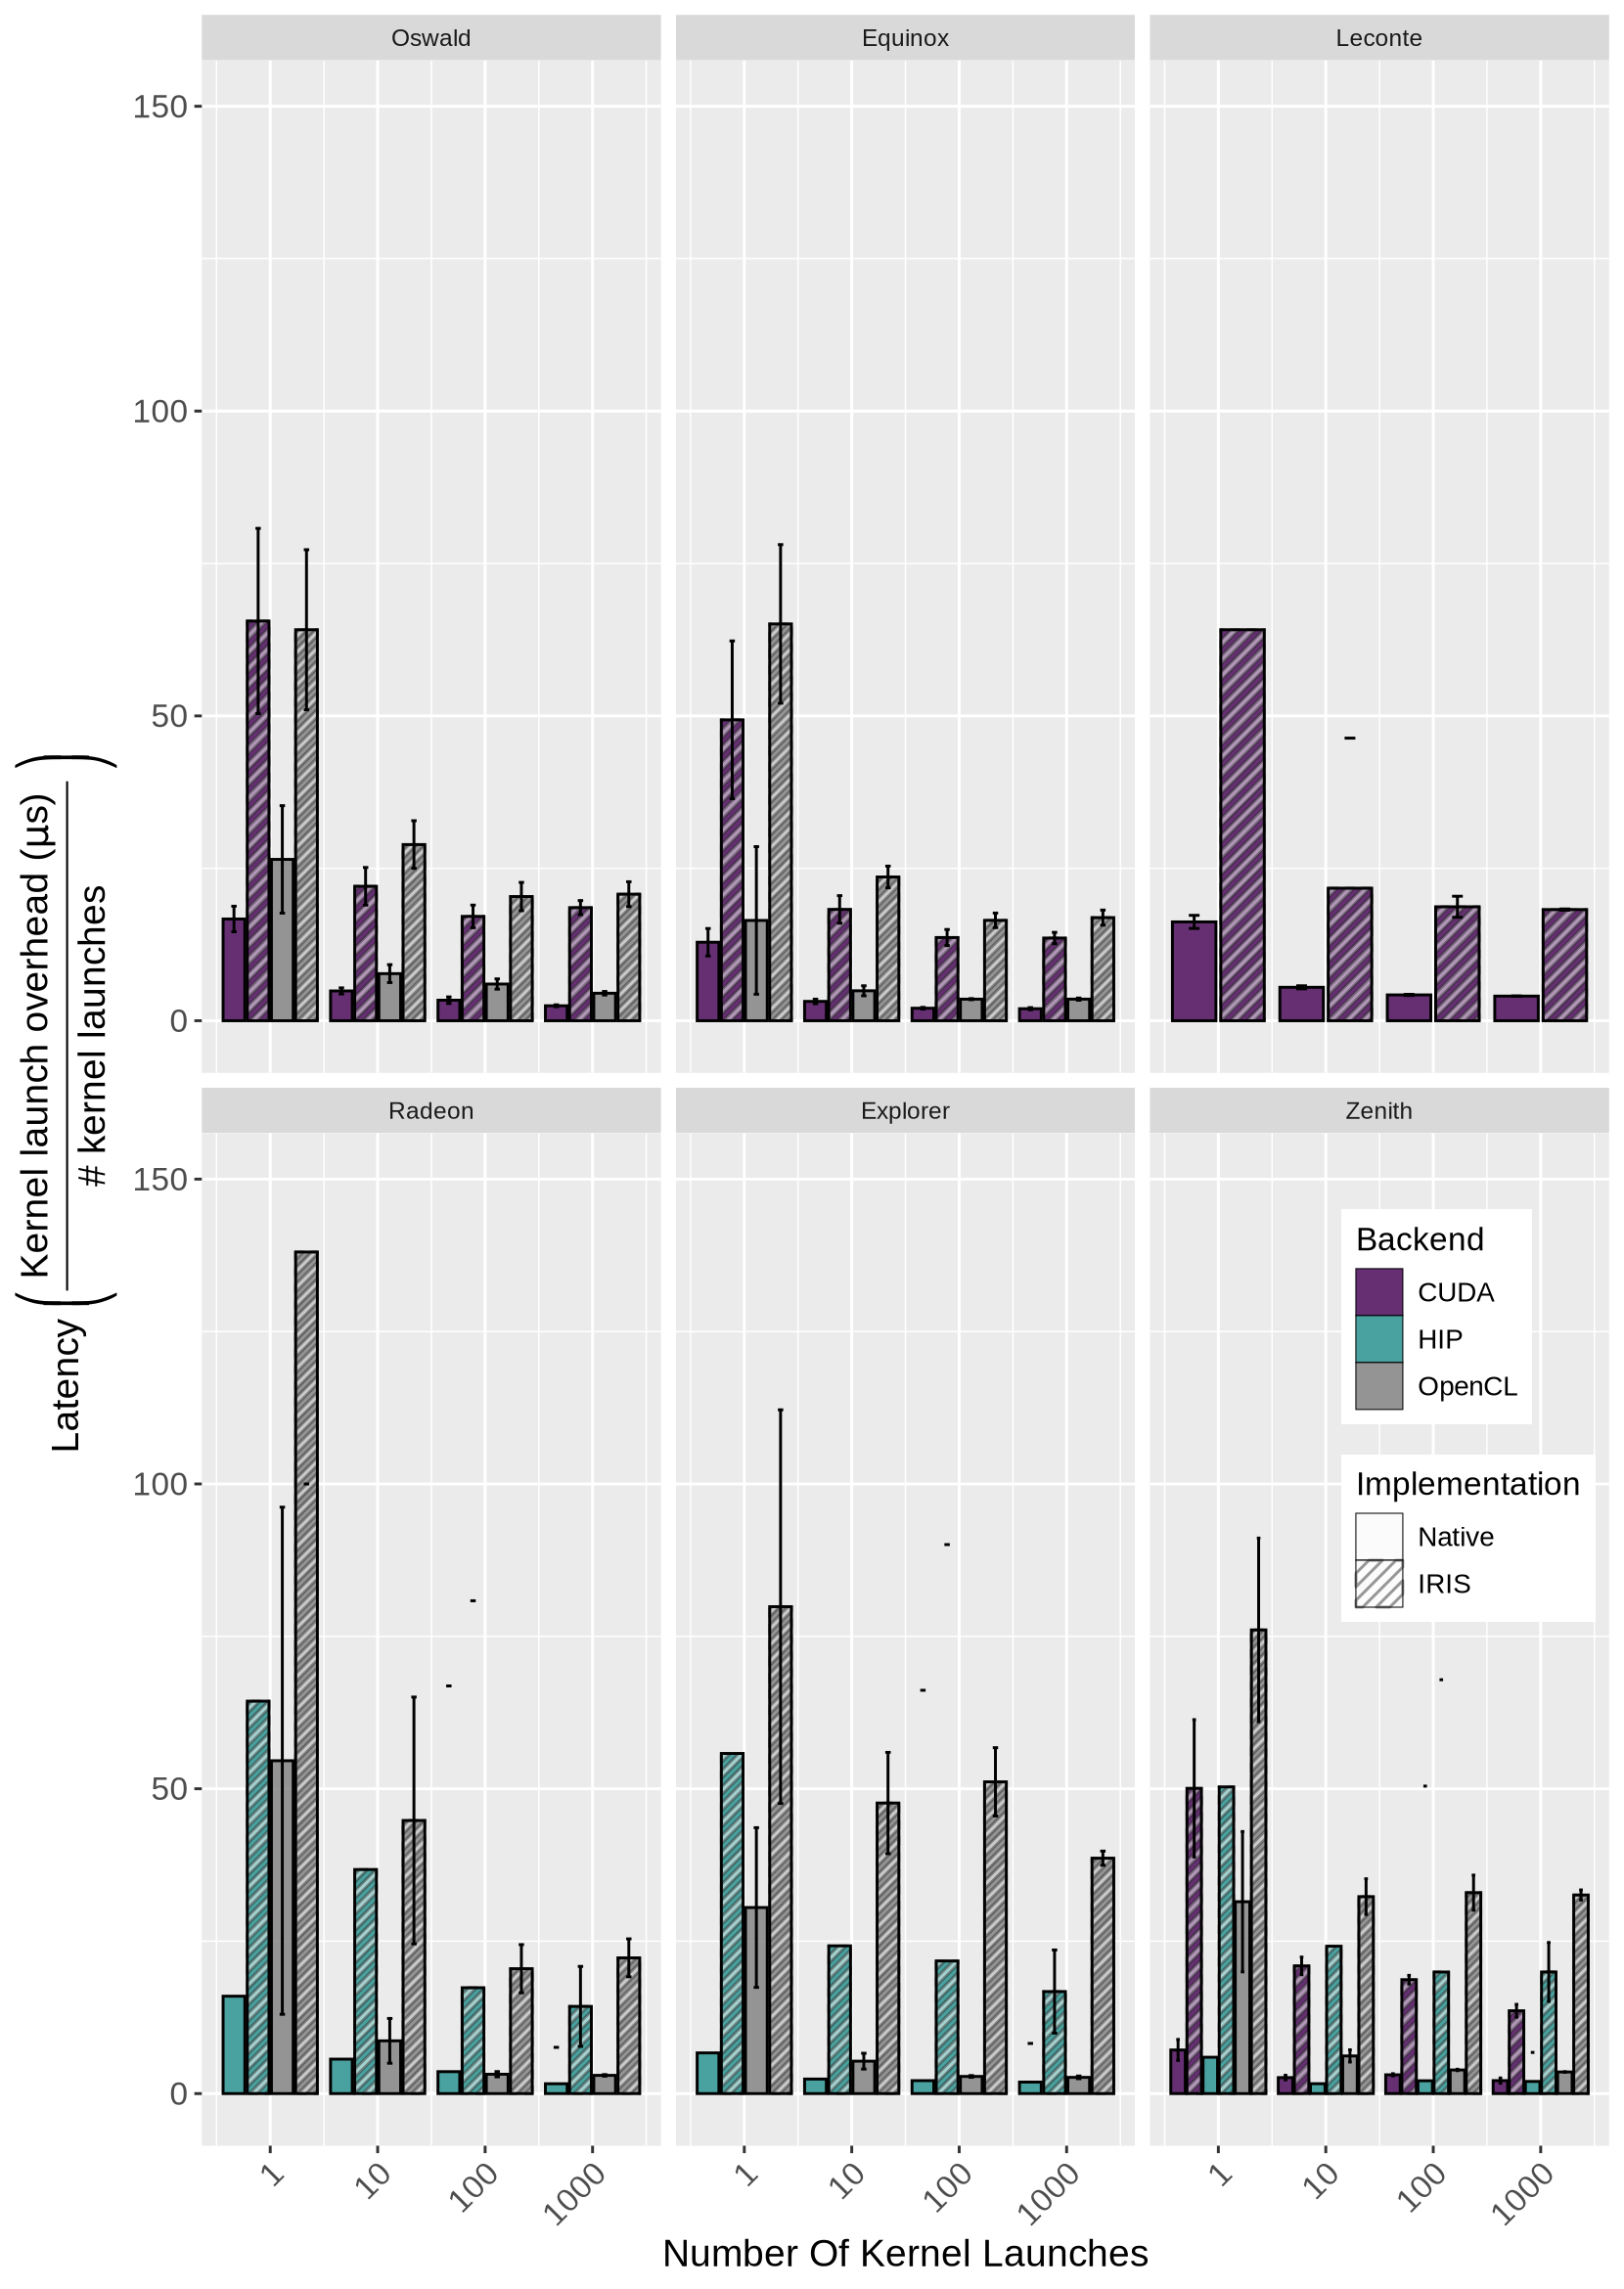

In [136]:
%%R -i kernellaunch -w 8.3 -h 11.7 --units in -r 200

outlier_size = 0.5

library('ggplot2')
library('latex2exp')
library('scales')
library('ggsci')
library("ggpattern")
library("dplyr")

desat <- function(cols, sat=0.5) {
    X <- diag(c(1, sat, 1)) %*% rgb2hsv(col2rgb(cols))
    hsv(X[1,], X[2,], X[3,])
}

#Create a custom color scale
#library(RColorBrewer)
#myColors <- pal_npg("nrc")(8)
myColors <- viridis_pal()(3)

myColors <- c(myColors[1], myColors[2], myColors[6]) 
#myColors <- c(rep(myColors[1],3),rep(myColors[2],3),rep(myColors[3],3))#copy each of the colours 3x

#change the saturation of the iris and multigpu runtimes
#for(i in seq(2,length(myColors),3)){
#    myColors[i] <- desat(myColors[i],0.6)
#}
#for(i in seq(3,length(myColors),3)){
#    myColors[i] <- desat(myColors[i],0.25)
#}

colScale <- scale_colour_manual(name = "Backend",values = myColors)
colFill <- scale_fill_manual(name="Backend",values=myColors)
kernellaunch$Backend <- kernellaunch$builton

#drop multigpu (iris-pooling)
kernellaunch <- subset(kernellaunch, version != "multigpu-iris-cuda" |  version != "multigpu-iris-hip" | version != "multigpu-iris-opencl" )
kernellaunch$version <- factor(kernellaunch$version)
print(levels(kernellaunch$version))

#reorder according to base implementation.
kernellaunch$version <- factor(kernellaunch$version, levels = c("cuda", "iris-cuda", "hip", "iris-hip", "opencl", "iris-opencl"))
names(myColors) <- levels(kernellaunch$Backend)

#reorder systems
kernellaunch$system <- factor(kernellaunch$system, levels = c("Oswald", "Equinox", "Leconte", "Radeon", "Explorer", "Zenith"))
print(unique(kernellaunch$system))
#rename and reorder implementations
#kernellaunch$runtime <- rename(kernellaunch$runtime, c("native" = "Native","iris" = "IRIS","multigpu" = "Multi-Device"))
kernellaunch <- subset(kernellaunch, runtime != "multigpu" )
kernellaunch$runtime <- factor(kernellaunch$runtime)

kernellaunch$runtime <- recode(kernellaunch$runtime, native = "Native", iris = "IRIS")
kernellaunch$runtime <- factor(kernellaunch$runtime,levels = c("Native","IRIS"))
print("Unique kernellaunch runtimes:")
print(unique(kernellaunch$runtime))
#drop Leconte
#kernellaunch %>% filter(system != "Leconte") %>% {. ->> kernellaunch}

#latency is the total duration times / the number of kernels invoked
kernellaunch$latency <- as.numeric(kernellaunch$runtimes) / kernellaunch$num_launches

library(dplyr)

kernellaunch%>%
group_by(num_launches,system,  version, runtime, Backend)%>% 
summarise(Mean=mean(latency), Max=max(latency), Min=min(latency), Median=median(latency), Std=sd(latency)) %>%
{. ->> kl_sum }

#p1 <- ggplot(kl_sum, aes(x=num_launches, y=Median, fill=version, group=interaction(num_launches,version))) + theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 6)) + expand_limits(y = 0) + labs(colour = "Version", fill="Version", y=TeX("Latency $\\left( \\frac{$ Kernel launch overhead ($\\mu$s) $}{$ # kernel launches $} \\right)$")) + geom_bar(stat='identity',position="dodge2",alpha=0.5) + scale_x_log10("Number Of Kernel Launches", breaks = trans_breaks("log10", function(x) 10^x)) + expand_limits(y = 0) + facet_wrap( ~ system, strip.position = "top", scales = "free_x")
p1 <- ggplot(kl_sum, aes(x=num_launches, y=Median, fill=Backend, pattern=runtime, group=interaction(num_launches,version))) + expand_limits(y = 0) + scale_x_log10("Number Of Kernel Launches", breaks = trans_breaks("log10", function(x) 10^x)) + expand_limits(y = 0) + facet_wrap( ~ system, strip.position = "top")
p1 <- p1 + geom_bar_pattern(stat='identity',position="dodge2",alpha=0.8, pattern_alpha=0.5, color = "black", pattern_fill = "white", pattern_angle = 45, pattern_density = 0.5, pattern_spacing = 0.025, pattern_key_scale_factor = 0.75) 
p1 <- p1 + scale_pattern_manual(values = c(Native = "none", IRIS = "stripe"))
p0 <- p1 + geom_errorbar(aes(ymin=Median-Std, ymax=Median+Std), width=.2, position=position_dodge(.9)) + colFill + colScale
p0 <- p0 + guides(fill   = guide_legend(override.aes = list(pattern = "none")))
p0 <- p0 + guides(pattern= guide_legend(override.aes = list(fill = "white")))
p0 <- p0 + labs(fill="Backend", pattern="Implementation", y=TeX("Latency $\\left( \\frac{$ Kernel launch overhead ($\\mu$s) $}{$ # kernel launches $} \\right)$"))
p0 <- p0 +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
          axis.title.x = element_text(size = 14),
          axis.text.y = element_text(size = 12),
          axis.title.y = element_text(size = 14),
          legend.text = element_text(size= 10),
          legend.title = element_text(size = 12),
          legend.position = c(0.90, 0.35))
p0 <- p0 + ylim(c(-1,150))
#p0 <- p0 + coord_cartesian(ylim=c(-1, 150)) # use coord_cartesian rather than ylim to avoid deleting data outside

print(p0)

ggsave(filename="latency.pdf",path="./iris-and-dagger-paper/figures",width=8.3,height=11.7,units="in",dpi="retina")


# Throughput

## CUDA and HIP

    Equinox    Explorer     Leconte      Oswald      Radeon      Zenith 
"#0D0887FF" "#5D01A6FF" "#9C179EFF" "#CC4678FF" "#ED7953FF" "#FDB32FFF" 
       <NA> 
"#F0F921FF" 
`summarise()` has grouped output by 'System', 'version'. You can override using
the `.groups` argument.


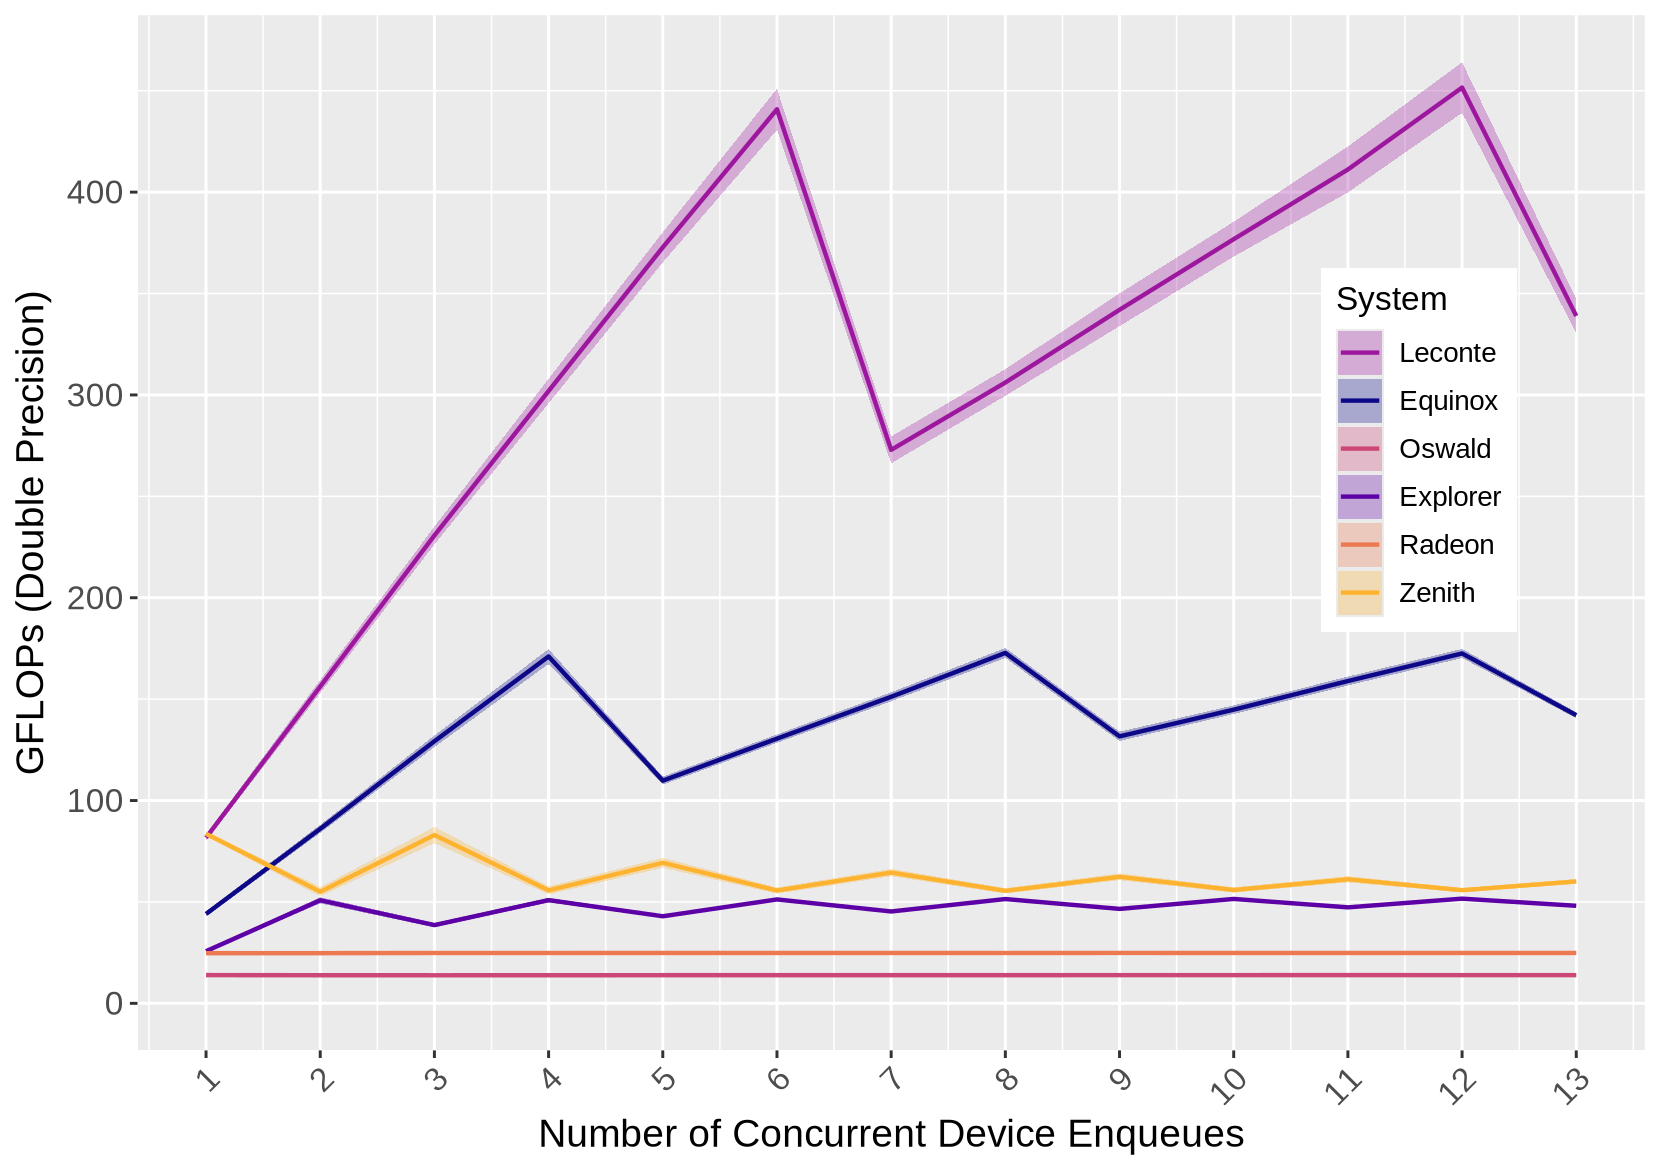

In [137]:
%%R -i throughput -h 5.85 -w 8.3 --units in -r 200

outlier_size = 0.5

library('ggplot2')
library('latex2exp')
library('scales')
library('ggsci')
library("ggpattern")
library("dplyr")
library("RColorBrewer")

desat <- function(cols, sat=0.5) {
    X <- diag(c(1, sat, 1)) %*% rgb2hsv(col2rgb(cols))
    hsv(X[1,], X[2,], X[3,])
}

#reorder systems
throughput$System <- throughput$system
throughput$System <- factor(throughput$System,
                            levels = c("leconte","equinox","oswald00", "explorer","radeon","zenith"),
                            labels=c("Leconte","Equinox","Oswald","Explorer","Radeon","Zenith"))

#Create a custom color scale
#myColors <- brewer.pal(n = 5, name = "Dark2")
myColors <- viridis_pal(option = "plasma")(7)
names(myColors) <- levels(factor(levels(throughput$System)))
print(myColors)
colScale <- scale_colour_manual(name="System",values=myColors)
colFill <- scale_fill_manual(name="System",values=myColors)

#reorder according to base implementation.
throughput$version <- recode(throughput$version, "iris-cuda" = "CUDA", "iris-hip" = "HIP", "iris-cuda+hip" = "CUDA+HIP" , "iris-opencl" = "OpenCL")
throughput$version <- factor(throughput$version, levels = c("CUDA","HIP","CUDA+HIP","OpenCL"))

throughput$num_devices <- as.integer(throughput$num_devices)

#drop OpenCL
throughput %>% filter(version != "OpenCL") %>% {. ->> throughput}

library(dplyr)

throughput%>%
group_by(System,  version, num_devices)%>% 
summarise(Mean=mean(GFLOPS), Max=max(GFLOPS), Min=min(GFLOPS), Median=median(GFLOPS), Std=sd(GFLOPS)) %>%
{. ->> tp_sum }

p0 <- ggplot(tp_sum, aes(x=num_devices, y=Median, group=interaction(System,version), colour=System, fill=System)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
          axis.title.x = element_text(size = 14),
          axis.text.y = element_text(size = 12),
          axis.title.y = element_text(size = 14),
          legend.text = element_text(size= 10),
          legend.title = element_text(size = 12),
          legend.position = c(0.85, 0.58)) +
    expand_limits(y =  c(0:450)) + labs(colour = "Version", fill="System", x="Number of Concurrent Device Enqueues", y=TeX("GFLOPs (Double Precision)"))
p0 <- p0 + geom_ribbon(aes(ymin = Median-Std, ymax = Median+Std),alpha=0.3, linetype = 0) + geom_line(aes(y = Median), alpha=1.0, size=0.75)
p0 <- p0 + colFill + colScale + scale_x_continuous(breaks=min(tp_sum$num_devices):max(tp_sum$num_devices))

print(p0)

ggsave(filename="throughput-native.pdf",path="./iris-and-dagger-paper/figures",width=8.3,height=5.85,units="in",dpi="retina")

#with patterns
#p1 <- ggplot(tp_sum, aes(x=num_devices, y=Median, group=interaction(System,version), colour=System)) + theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 6)) + expand_limits(y = 0) + labs(colour = "Version", fill="System", x="Number of Concurrent Device Enqueues", y=TeX("GFLOPs (Double Precision)"))
#p1 <- p1 + geom_ribbon_pattern(aes(ymin = Median-Std, ymax = Median+Std, colour=System, fill=System, pattern=version),alpha=0.25, pattern_alpha=0.5, color = "black", pattern_fill = "white", pattern_angle = 45, pattern_density = 0.5, pattern_spacing = 0.025, pattern_key_scale_factor = 0.75) + geom_path(aes(y = Median), alpha=1.0)
#p1 <- p1 + scale_pattern_manual(values = c(CUDA = "none", HIP = "stripe", OpenCL = "crosshatch"))
#p1 <- p1 + colFill + colScale
#p1 <- p1 + guides(fill   = guide_legend(override.aes = list(pattern = "none")))
#p1 <- p1 + guides(pattern= guide_legend(override.aes = list(fill = "white")))
#p0 <- p1 + geom_errorbar(aes(ymin=Median-Std, ymax=Median+Std), width=.2, position=position_dodge(.9)) + colFill + colScale
#p0 <- p0 + theme(legend.position = c(0.85, 0.25))
#print(p1)


Scripted For-Loop: Yes, Event Profiler: No, Elements: 2048, Application For-Loop: Yes

## OpenCL

    Equinox    Explorer     Leconte      Oswald      Radeon      Zenith 
"#0D0887FF" "#5D01A6FF" "#9C179EFF" "#CC4678FF" "#ED7953FF" "#FDB32FFF" 
       <NA> 
"#F0F921FF" 
`summarise()` has grouped output by 'System', 'version'. You can override using
the `.groups` argument.


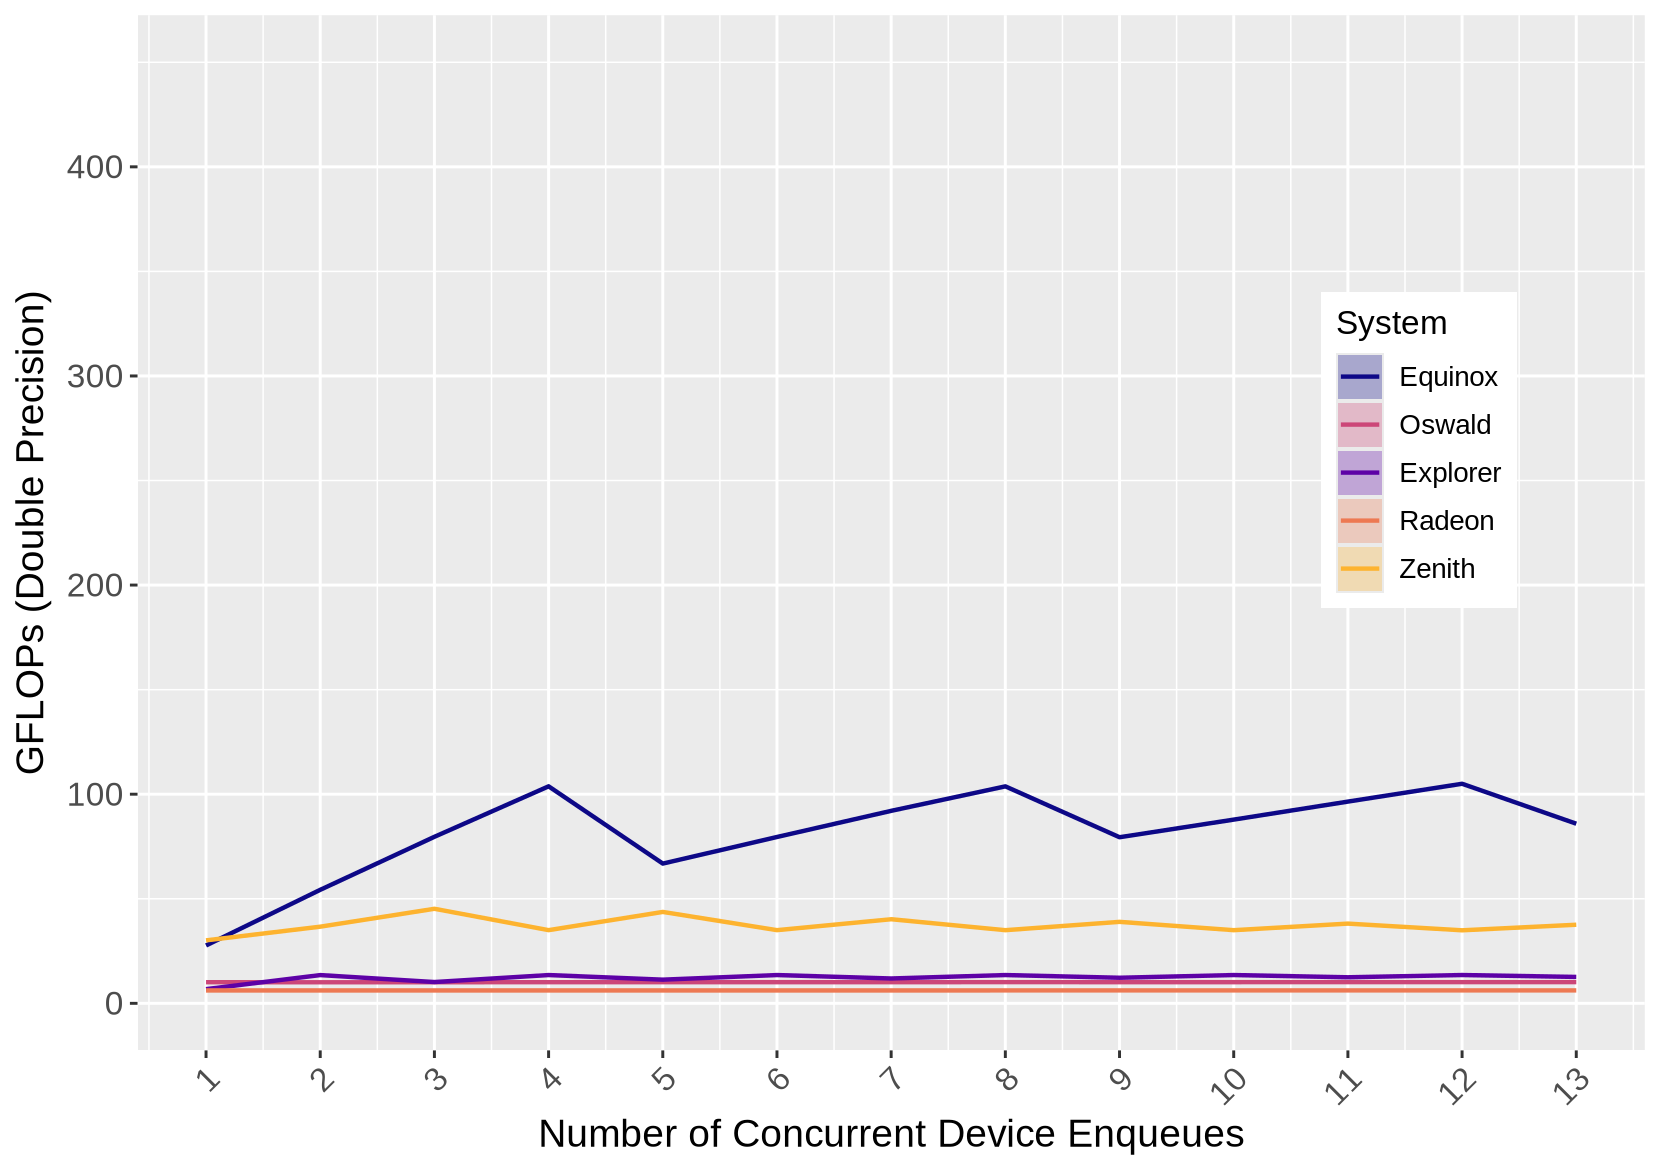

In [138]:
%%R -i throughput -h 5.85 -w 8.3 --units in -r 200

outlier_size = 0.5

library('ggplot2')
library('latex2exp')
library('scales')
library('ggsci')
library("ggpattern")
library("dplyr")

desat <- function(cols, sat=0.5) {
    X <- diag(c(1, sat, 1)) %*% rgb2hsv(col2rgb(cols))
    hsv(X[1,], X[2,], X[3,])
}

#reorder systems
throughput$System <- throughput$system
throughput$System <- factor(throughput$System,
                            levels = c("leconte","equinox","oswald00", "explorer","radeon","zenith"),
                            labels=c("Leconte","Equinox","Oswald","Explorer","Radeon","Zenith"))

#myColors <- brewer.pal(n = 5, name = "Dark2")
myColors <- viridis_pal(option="plasma")(7)
names(myColors) <- levels(factor(levels(throughput$System)))
print(myColors)
colScale <- scale_colour_manual(name = "System",values=myColors)
colFill <- scale_fill_manual(name="System",values=myColors)

#reorder according to base implementation.
throughput$version <- recode(throughput$version, "iris-cuda" = "CUDA", "iris-hip" = "HIP", "iris-opencl" = "OpenCL")
throughput$version <- factor(throughput$version, levels = c("CUDA","HIP","OpenCL"))

throughput$num_devices <- as.integer(throughput$num_devices)

#drop CUDA and HIP
throughput %>% filter(version == "OpenCL") %>% {. ->> throughput}

library(dplyr)

throughput%>%
group_by(System,  version, num_devices)%>% 
summarise(Mean=mean(GFLOPS), Max=max(GFLOPS), Min=min(GFLOPS), Median=median(GFLOPS), Std=sd(GFLOPS)) %>%
{. ->> tp_sum }

p0 <- ggplot(tp_sum, aes(x=num_devices, y=Median, group=interaction(System,version), colour=System, fill=System)) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
          axis.title.x = element_text(size = 14),
          axis.text.y = element_text(size = 12),
          axis.title.y = element_text(size = 14),
          legend.text = element_text(size= 10),
          legend.title = element_text(size = 12),
          legend.position = c(0.85, 0.58)) +
    expand_limits(y =  c(0:450)) + labs(colour = "Version", fill="System", x="Number of Concurrent Device Enqueues", y=TeX("GFLOPs (Double Precision)"))
p0 <- p0 + geom_ribbon(aes(ymin = Median-Std, ymax = Median+Std),alpha=0.3, linetype = 0) + geom_line(aes(y = Median), alpha=1.0, size=0.75)
p0 <- p0 + colFill + colScale + scale_x_continuous(breaks=min(tp_sum$num_devices):max(tp_sum$num_devices))

print(p0)
ggsave(filename="throughput-opencl.pdf",path="./iris-and-dagger-paper/figures",height=5.85,width=8.3,units="in",dpi="retina")

# Memory


`summarise()` has grouped output by 'system', 'Backends'. You can override
using the `.groups` argument.


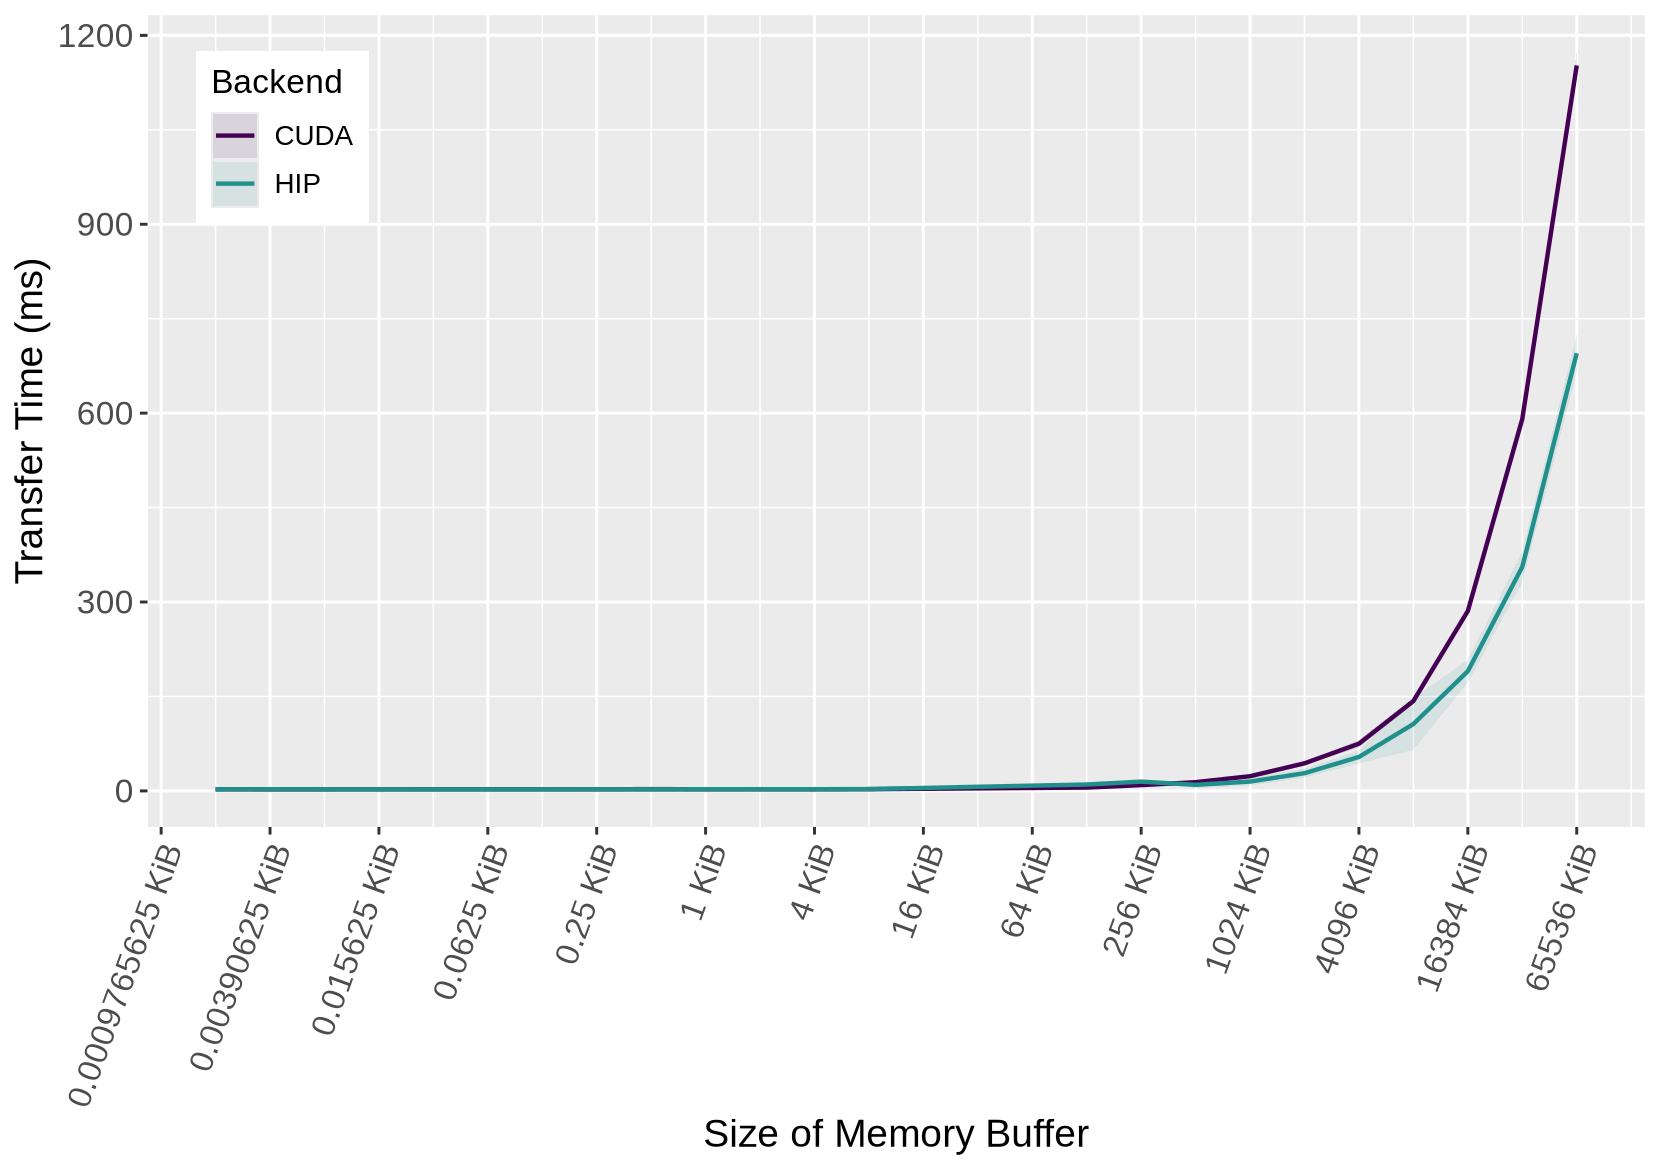

In [190]:
%%R -i transfer_size -h 5.85 -w 8.3 --units in -r 200
full_transfer_size <- transfer_size
library('ggplot2')
library('latex2exp')
library("dplyr")
library('viridis')
library('scales')

pred <- function(x){
    #return(6.830503e-01 + 1.884382e-06*x)
    return(3.295 + 1.976e-06*x)
}

full_transfer_size$system <- factor(full_transfer_size$system, levels = c("Oswald", "Equinox", "Leconte", "Radeon", "Explorer"))
full_transfer_size$elements <- as.integer(full_transfer_size$KiB)

myColours <- viridis_pal()(3)
myColours <- c(myColours[1], myColours[2], myColours[6]) 
colScale <- scale_colour_manual(name = "Backend",values = myColours)
colFill <- scale_fill_manual(name="Backend",values=myColours)
full_transfer_size$Backends <- toupper(full_transfer_size$version)
names(myColours) <- levels(full_transfer_size$Backends)

full_transfer_size%>%
group_by(system,  Backends, elements)%>%
summarise(Mean=mean(ms), Max=max(ms), Min=min(ms), Median=median(ms), Std=sd(ms)) %>%
{. ->> res }

res$Predicted <- pred(res$elements)
outlier_size = 0.5

p0 <- ggplot(res, aes(x=elements, y=Median, fill=Backends,colour=Backends, group=interaction(Backends)))
p0 <- p0 + scale_x_continuous(trans='log2',  breaks = trans_breaks("log2", function(x) 2^x, n = 12), labels = function(x) paste(x/1024,"KiB") )
#p0 <- p0 + facet_wrap( ~ system, strip.position = "top", scales = "free_x")
p0 <- p0 + geom_ribbon(aes(ymin = Median-Std, ymax = Median+Std),alpha=0.1, linetype = 0)
p0 <- p0 + geom_line(aes(y = Median), alpha=1.0, size=0.75)
#p0 <- p0 + geom_line(aes(y = Predicted),linetype="dotted",colour="black")
p0 <- p0 + colFill + colScale
p0 <- p0 + guides(fill   = guide_legend(override.aes = list(pattern = "none")))
p0 <- p0 + guides(pattern= guide_legend(override.aes = list(fill = "white")))
p0 <- p0 + labs(colour="Backends", pattern="Implementation", y="Transfer Time (ms)", x="Size of Memory Buffer")
p0 <- p0 + theme(axis.text.x = element_text(angle = 70, hjust = 1, size = 12),
          axis.title.x = element_text(size = 14),
          axis.text.y = element_text(size = 12),
          axis.title.y = element_text(size = 14),
          legend.text = element_text(size= 10),
          legend.title = element_text(size = 12),
          legend.position = c(0.09, 0.85))
print(p0)

ggsave(filename="predicted-vs-measured-transfer-size.pdf",path="./iris-and-dagger-paper/figures",width=8.3,height=5.85,units="in",dpi="retina")
                                                                

# DAGGER

DAGs used in the paper were generated by running `run_policy_evaluation.sh` from the `apps/dagger` subdirectory. DAGs are generated at the beginning of the experiment and are stored in a directory called `dagger-payloads`.

The DAGs mentioned are `apps/dagger/dagger-graphs/linear10-graph.pdf`, `apps/dagger/dagger-graphs/diamond10-graph.pdf`, `apps/dagger/dagger-graphs/chainlink10-graph.pdf`, and `apps/dagger/dagger-graphs/tangled10-graph.pdf`

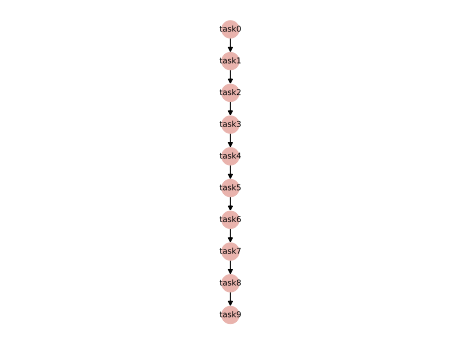

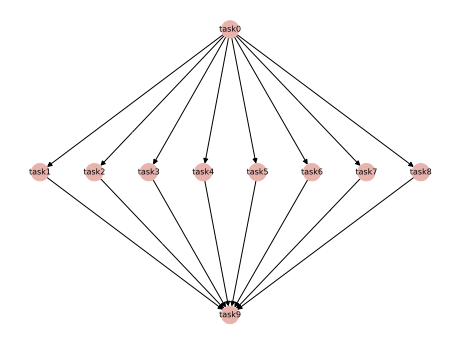

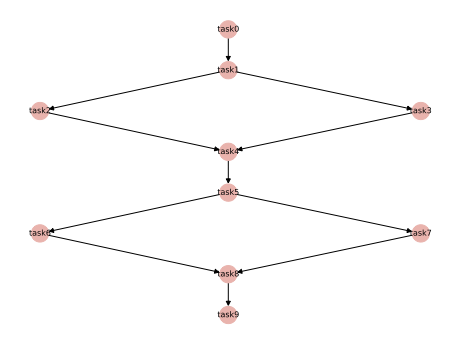

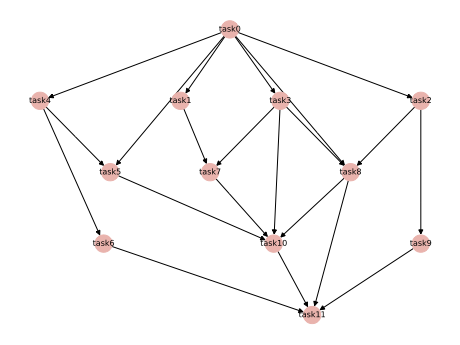

The poor scheduling decisions figures were taken directly from this `run_policy_evaluation.sh`.
They are `apps/dagger/dagger-graphs/datamemlinear10-roundrobin-equinox-timeline.pdf` and `apps/dagger/dagger-graphs/datamemlinear10-roundrobin-equinox-dag.pdf`

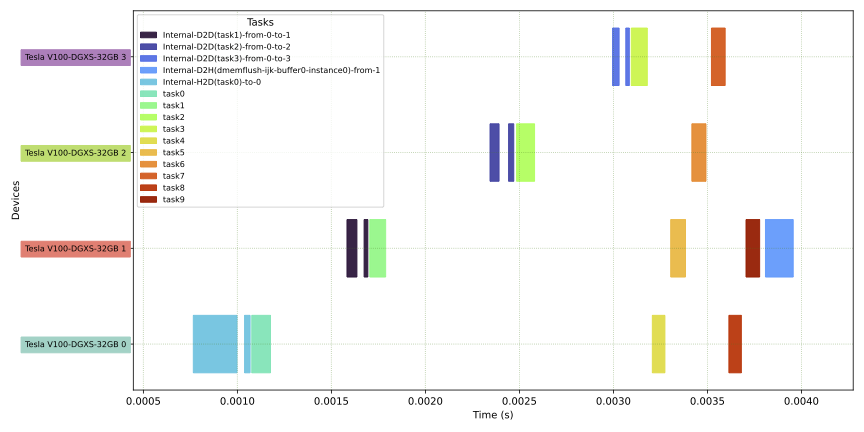

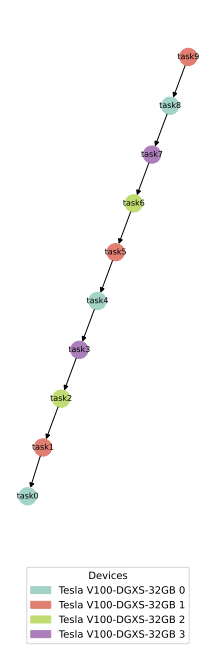

# Heatmap

The data was generated by running: `./run_policy_evaluation.sh` on all systems. These execution times are stored in the `dagger-results` directory as a series of csv files.
From the `gantt` subdirectory, if you run `python ./heatmap.py --output-file ../dagger-graphs/heatmap.pdf` yields:

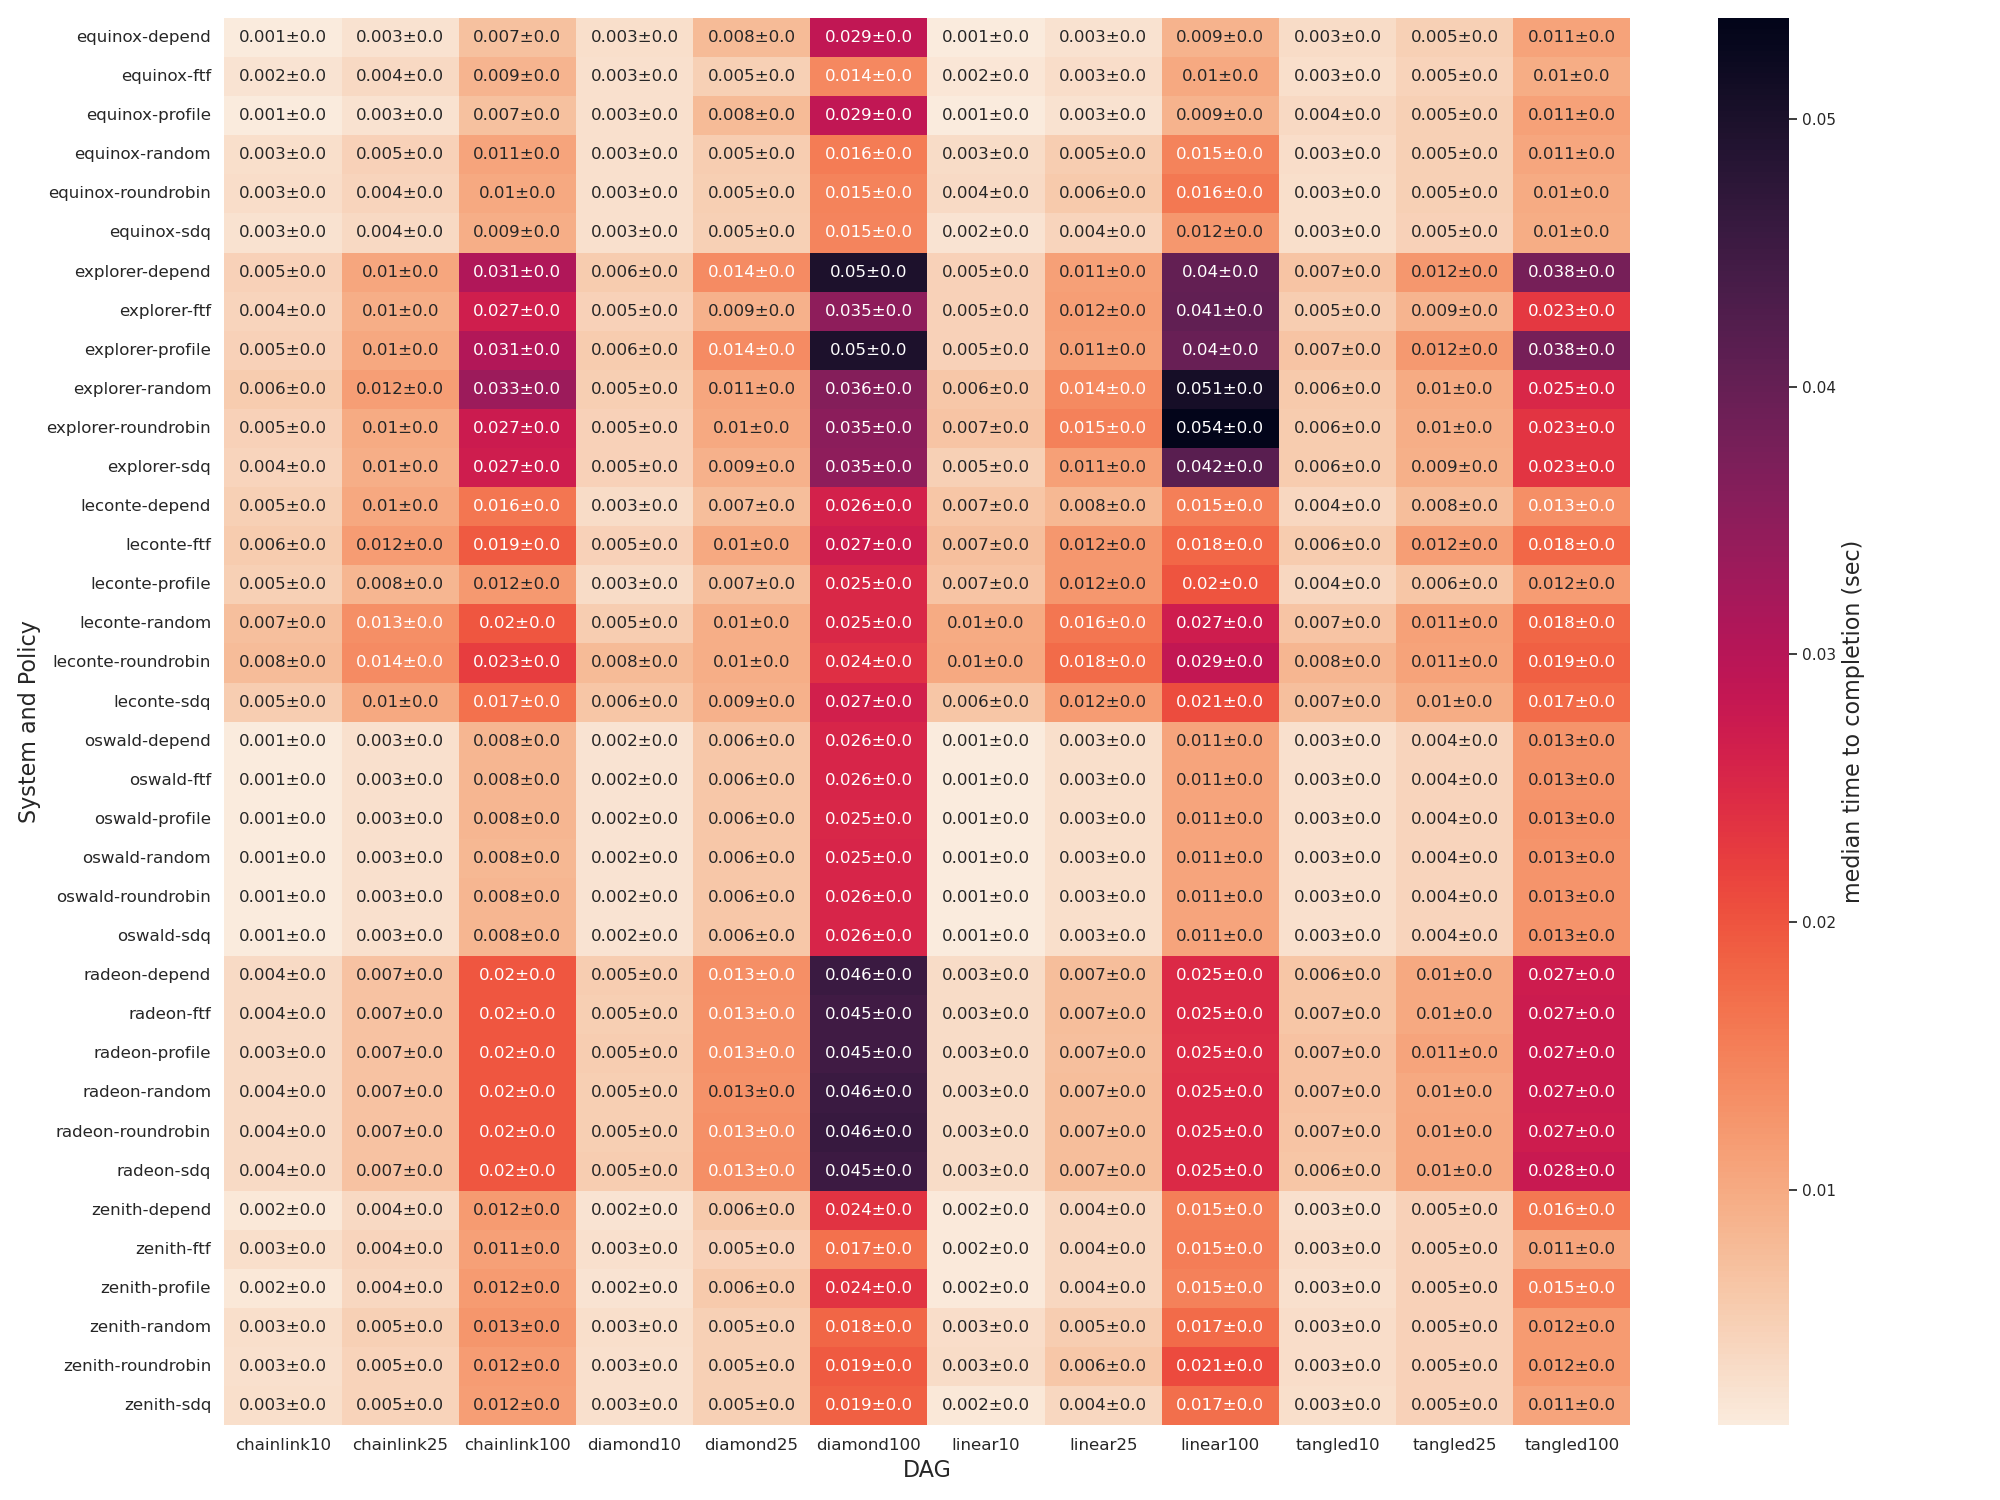

# Bringing it all together

The final set of figures showing how the selection of IRIS scheduling policy impacts performance have been stored in `wamta.tar` and should be extracted into the `apps/dagger/` directory, it will expand to a separate wamta subdirectory. It contains a `benchmark.sh` script to generate all these results but if you used the already archived results you will generate the following figures.

The generated DAG used for our experiments is found at `./wamta_paper/dag.pdf`

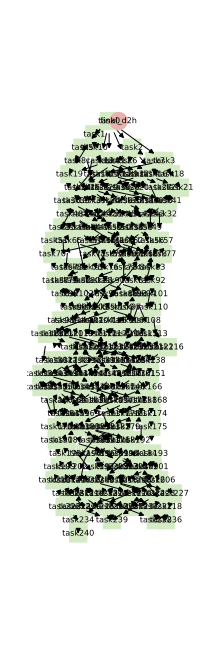

The same DAG recolourized to devices to the selected devices (according to the scheduling policy) is shown in the following cell.

filename is zenith-random-recoloured_dag.pdf
filename is zenith-ftf-recoloured_dag.pdf
filename is zenith-roundrobin-recoloured_dag.pdf
filename is zenith-depend-recoloured_dag.pdf
filename is zenith-sdq-recoloured_dag.pdf
filename is zenith-profile-recoloured_dag.pdf


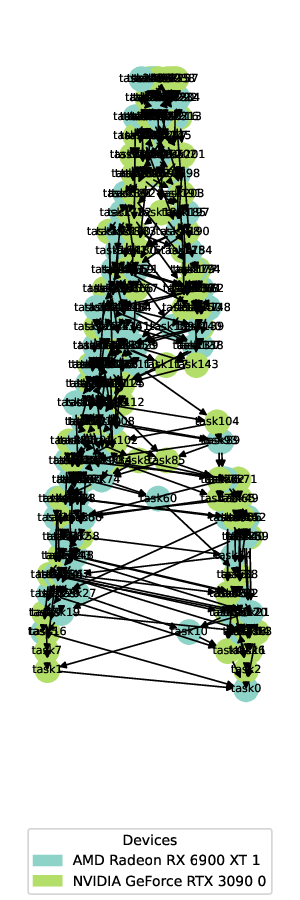

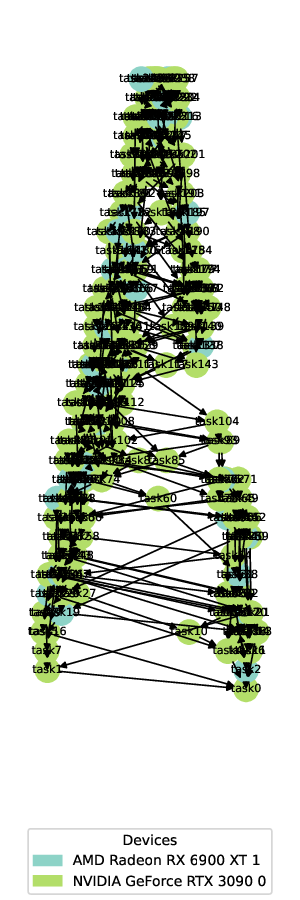

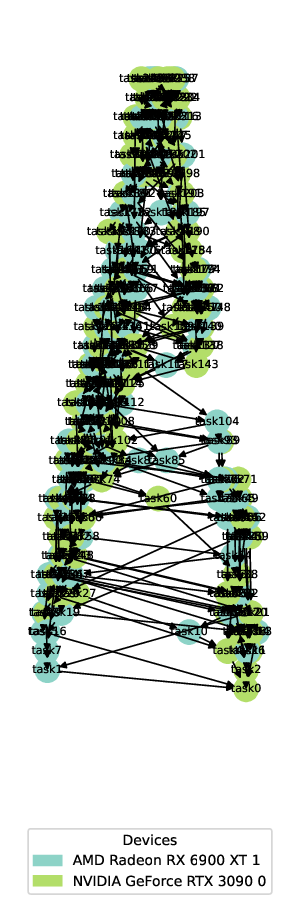

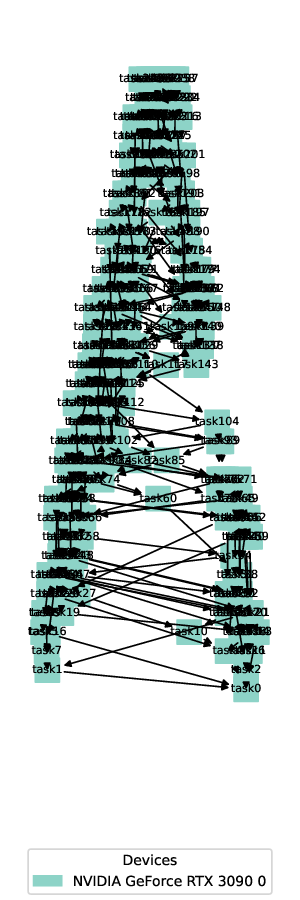

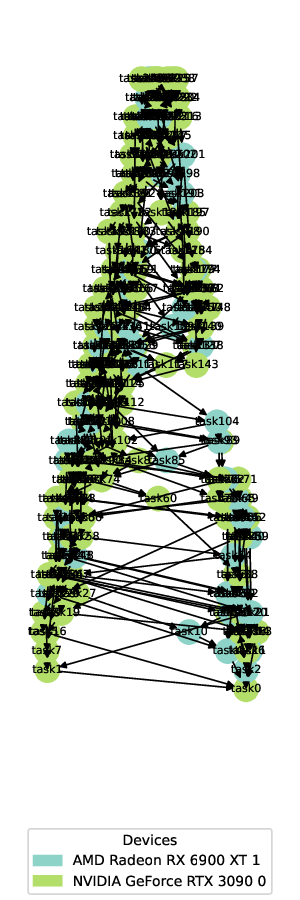

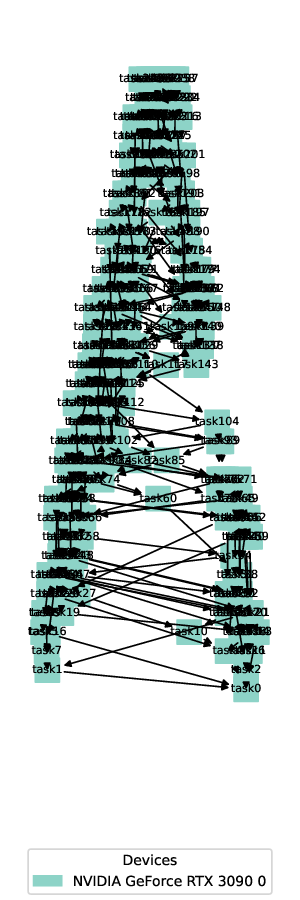

In [70]:
from wand.image import Image as WImage
import glob
dag_images = glob.glob("./wamta_paper/zenith-*-recoloured_dag.pdf")
images = []
for i in dag_images:
    print("filename is {}".format(i))
    images.append(WImage(filename=i, resolution=100))
display(*images)

Along with the actual timeline:

filename is zenith-sdq-timeline.pdf
filename is zenith-roundrobin-timeline.pdf
filename is zenith-depend-timeline.pdf
filename is zenith-profile-timeline.pdf
filename is zenith-ftf-timeline.pdf
filename is zenith-random-timeline.pdf


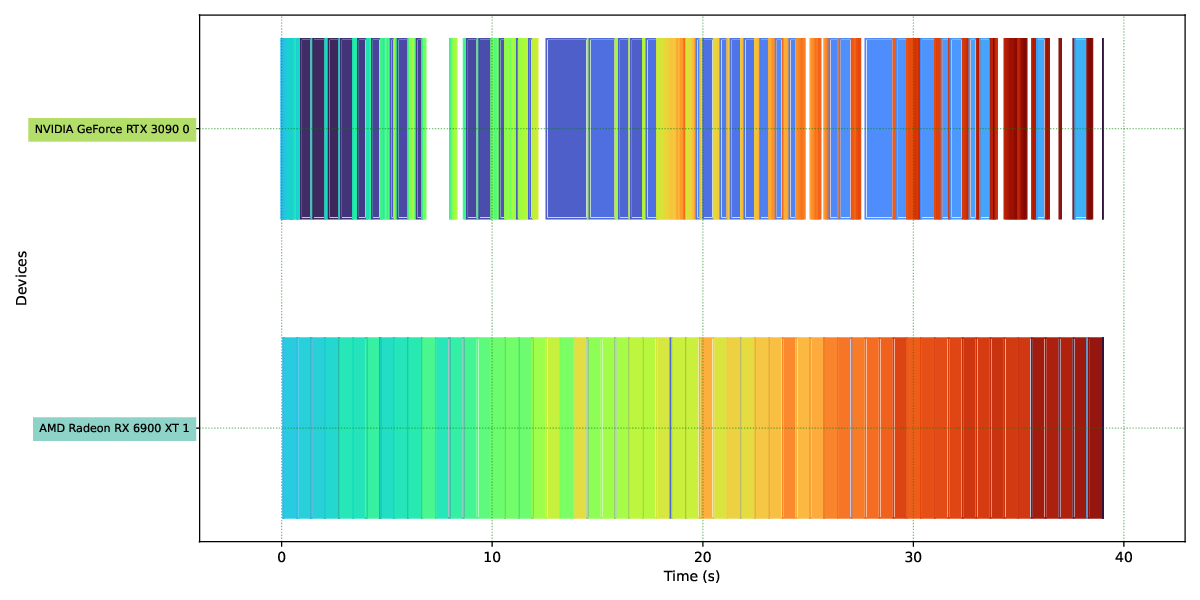

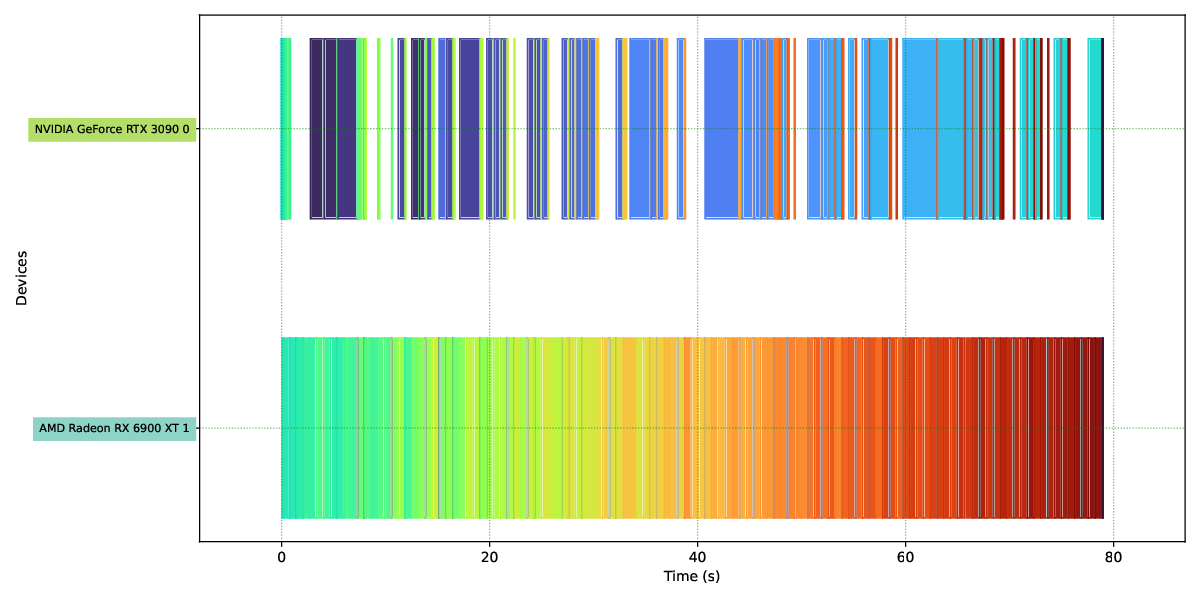

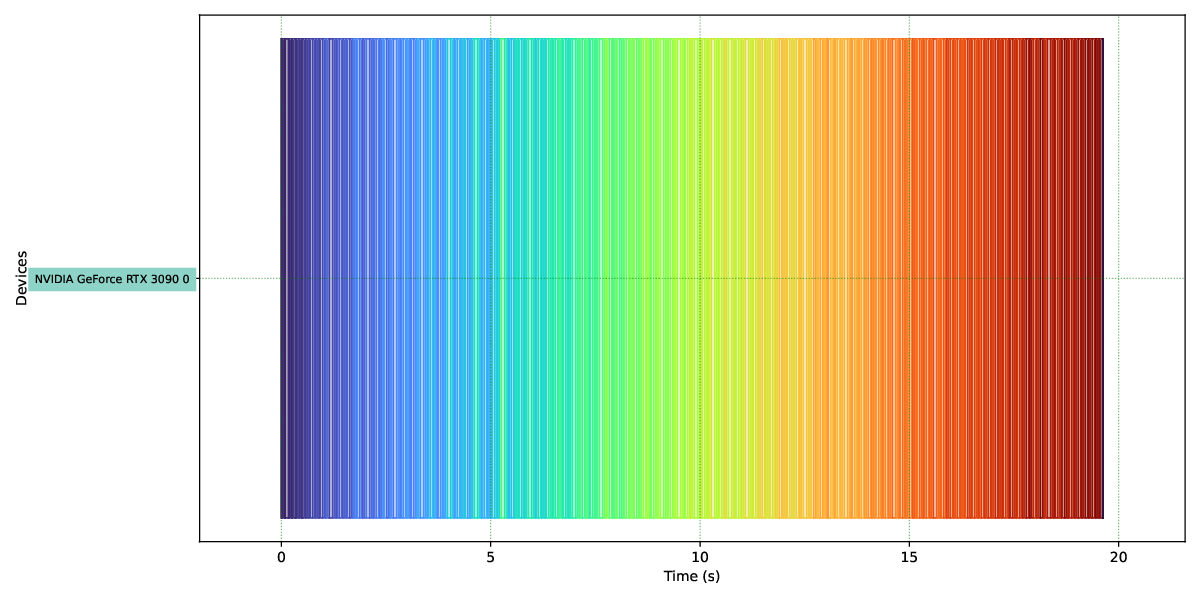

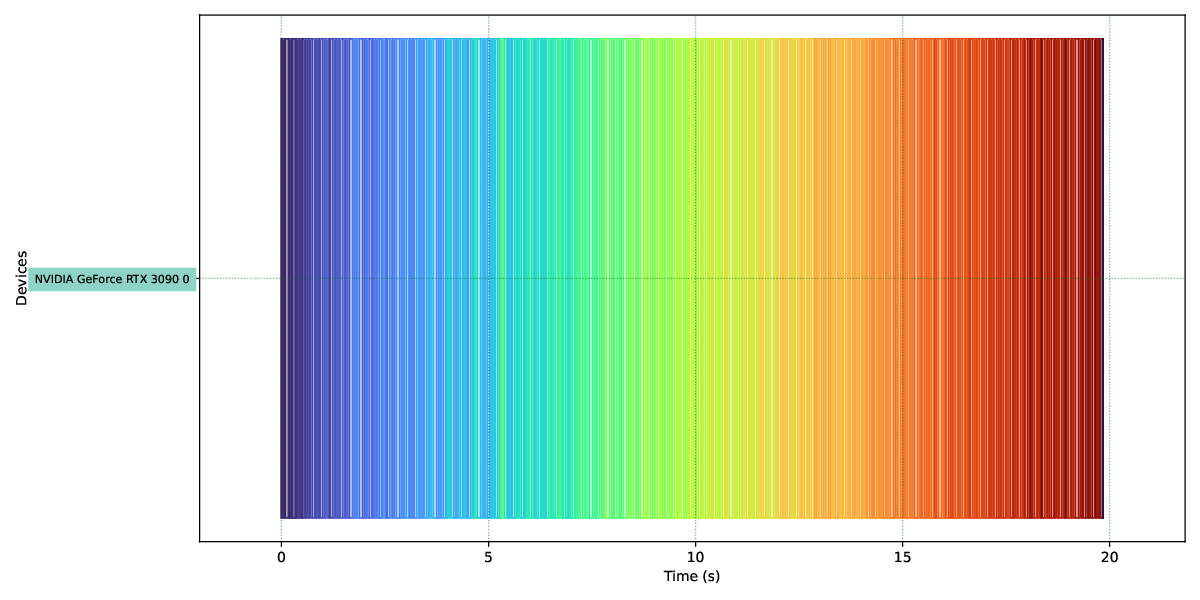

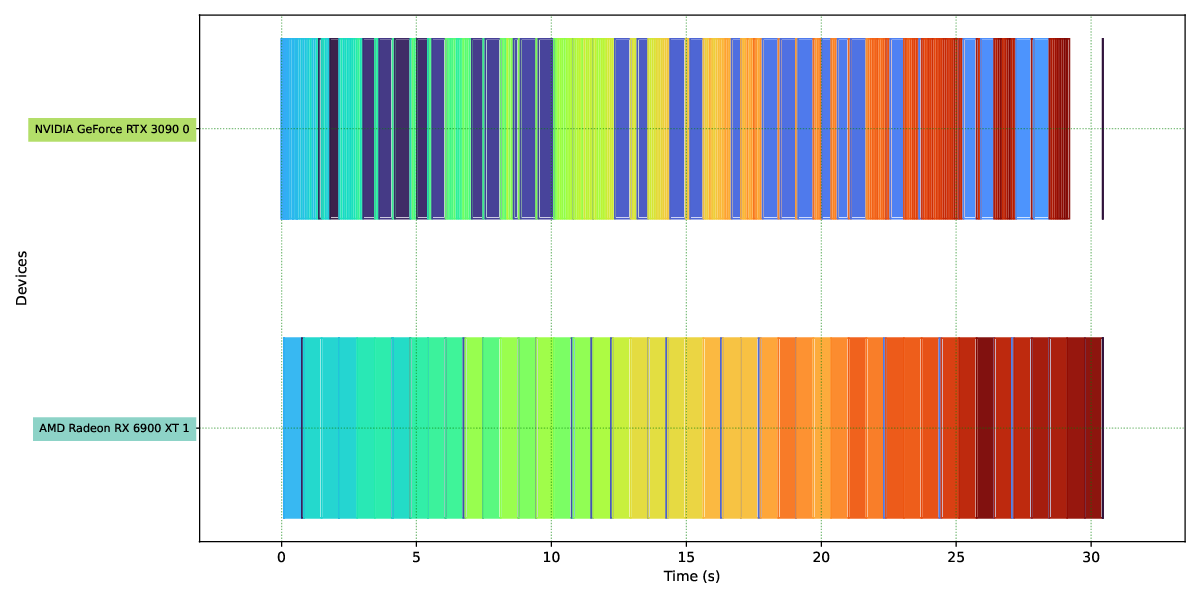

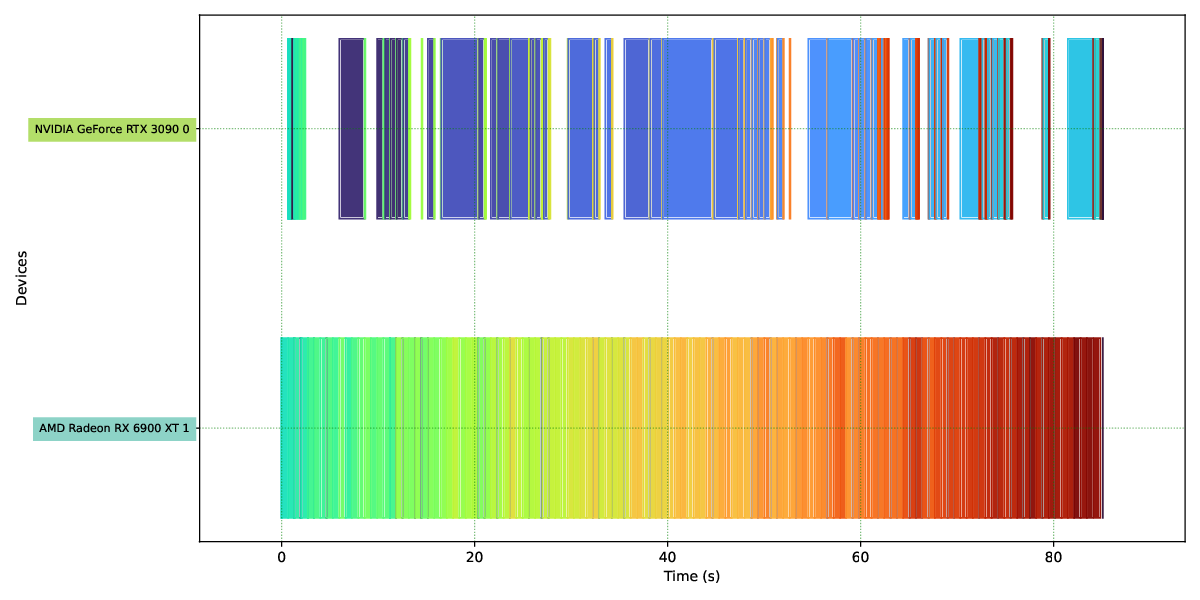

In [71]:
from wand.image import Image as WImage
import glob
timeline_images = glob.glob("./wamta_paper/zenith-*-timeline.pdf")
images = []
for i in timeline_images:
    print("filename is {}".format(i))
    images.append(WImage(filename=i, resolution=100))
display(*images)

Leconte
----------

filename is leconte-profile-timeline.pdf
filename is leconte-ftf-timeline.pdf
filename is leconte-sdq-timeline.pdf
filename is leconte-depend-timeline.pdf
filename is leconte-roundrobin-timeline.pdf
filename is leconte-random-timeline.pdf


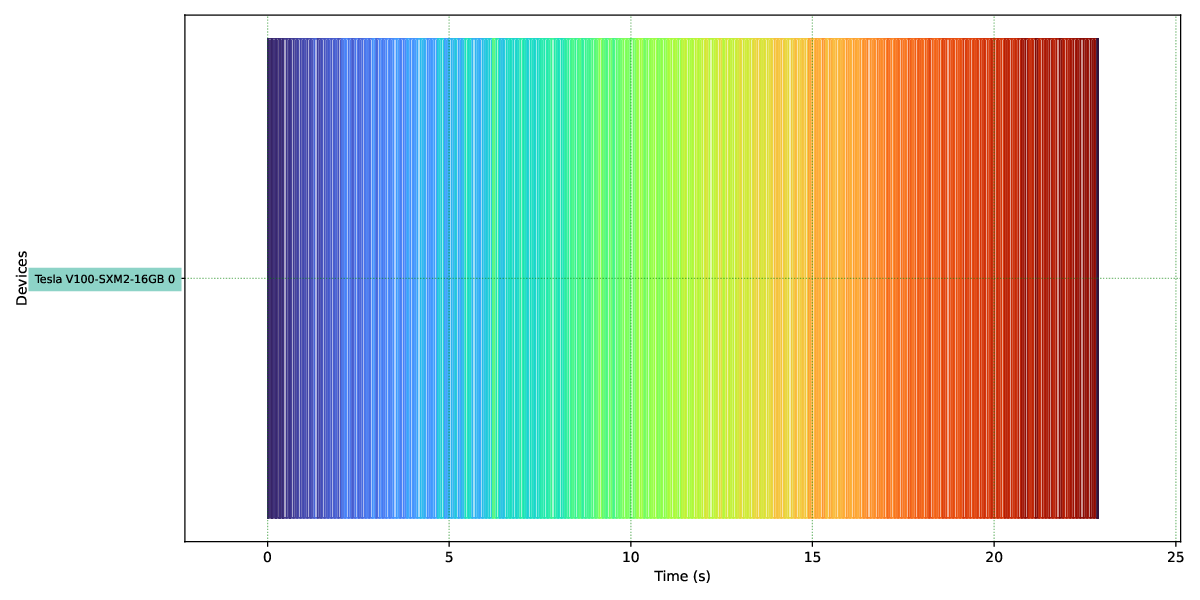

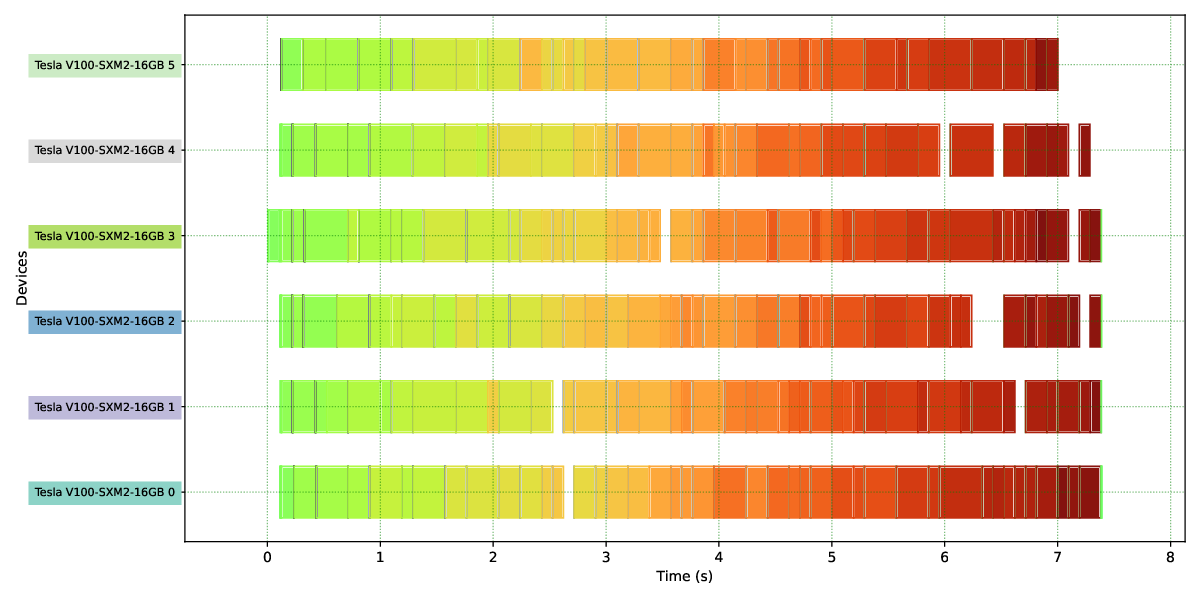

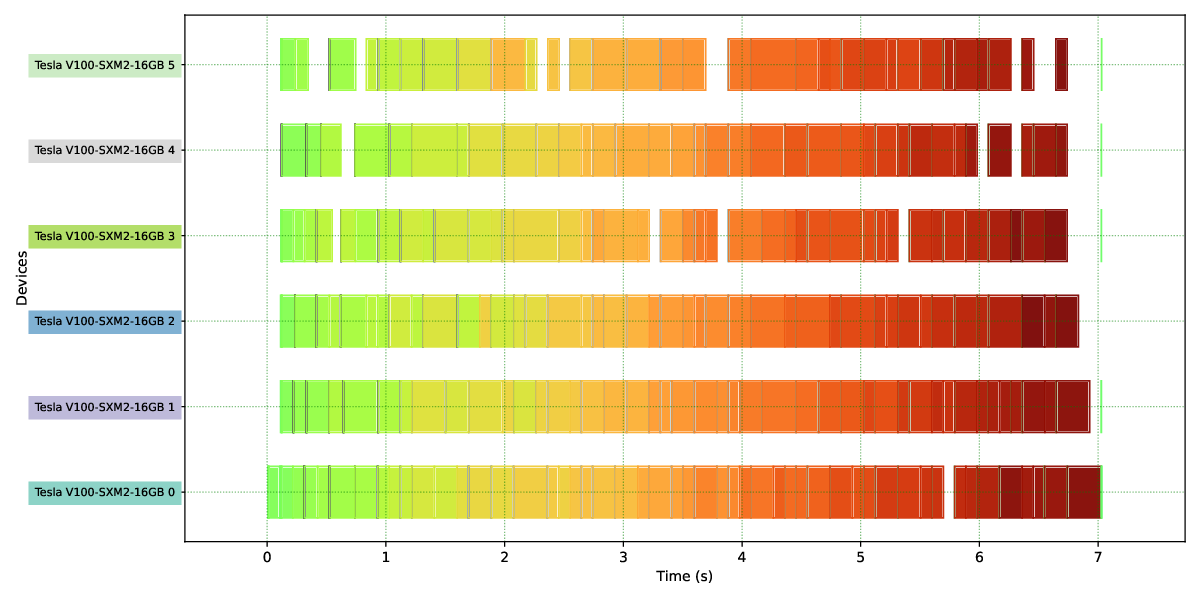

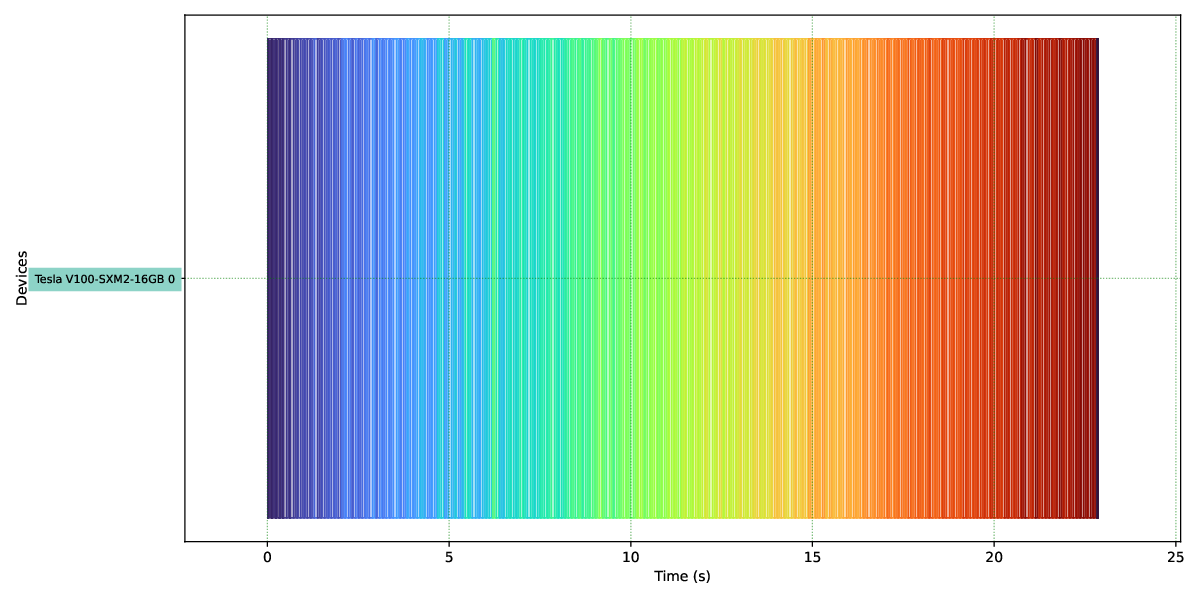

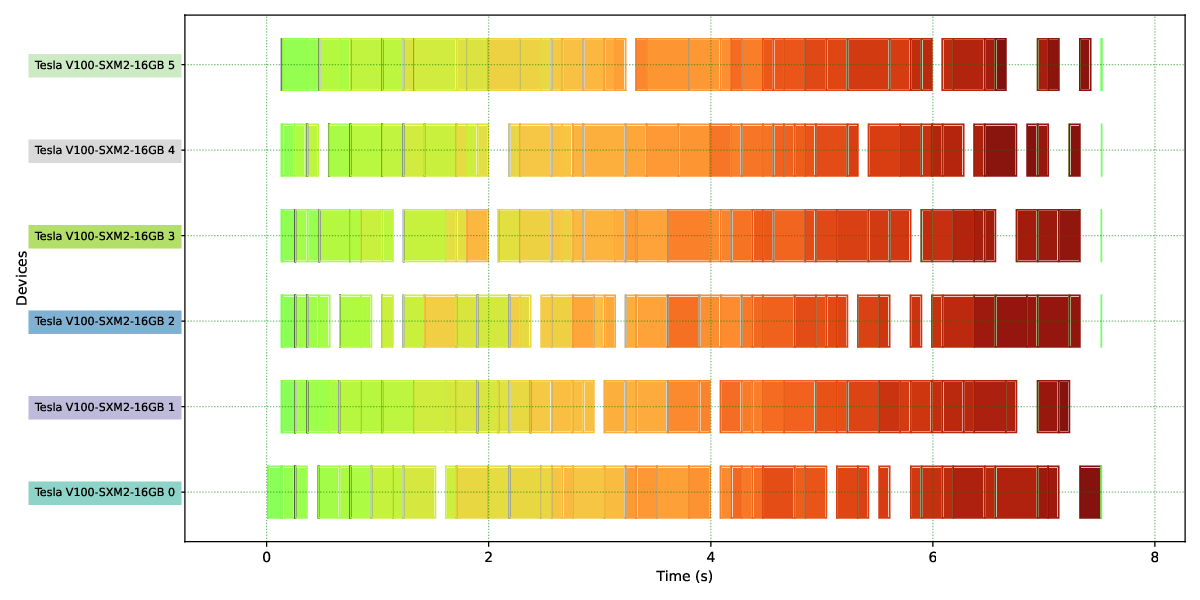

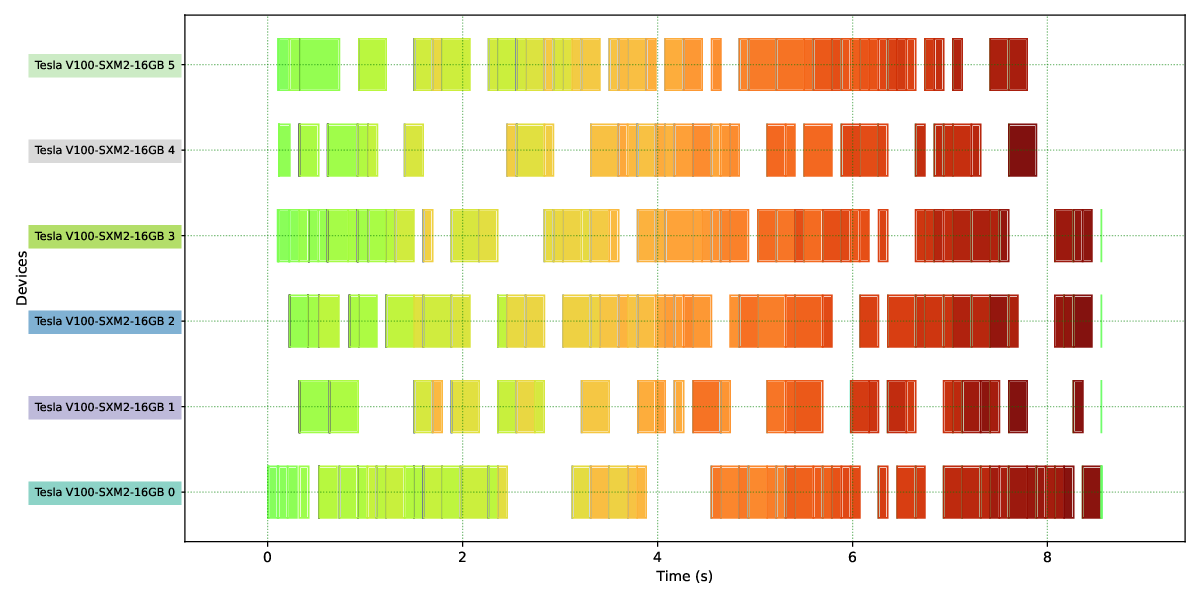

In [72]:
from wand.image import Image as WImage
import glob
timeline_images = glob.glob("./wamta_paper/leconte-*-timeline.pdf")
images = []
for i in timeline_images:
    print("filename is {}".format(i))
    images.append(WImage(filename=i, resolution=100))
display(*images)

We see that the "depend" policy assigns all tasks to the device which was initially assigned the data and so effectively serializes the job to a single accelerator.

Questions:
-------------
- Why is this the fastest?
- Can we give enough work to justify using a second accelerator?
- Why isn't the CPU (OpenMP) backend used at all?
    + it isn't compiling / resolving the iris_openmp_kernel/iris_openmp_kernel_with_obj for OpenMP kernel:ijk


Future Work:
---------------
* Pin all work to device 0 and compare to the best scheduling policy (minimum absolute execution time)?
* Or many scheduling policies?
* Normalize this according to the number of devices available? Would give a consistent score 0-100
    + automate speedup factors
    + generate bar plot (of all system/policy pairs)
    + script workflow for multiple device targets (rather than having to edit the build script)
    + report how Zenith is the only systems to experience a slow-down when allocating the work amongst multiple devices (because two different device vendors)
    + add local-workgroup-size to the dagger runner to allow larger workgroups to be passed into HIP

           scheduler       secs    system  num_gpus
oswald00      depend  211.75700  oswald00       1.0
radeon        depend  177.04100    radeon       1.0
zenith        depend   19.42040    zenith       2.0
explorer      depend  170.26600  explorer       2.0
equinox       depend   65.05600   equinox       4.0
leconte       depend   22.84700   leconte       6.0
oswald00         ftf  211.74500  oswald00       1.0
radeon           ftf  177.08700    radeon       1.0
zenith           ftf   28.79470    zenith       2.0
explorer         ftf   85.85040  explorer       2.0
equinox          ftf   21.63650   equinox       4.0
leconte          ftf    7.19271   leconte       6.0
oswald00     profile  211.76600  oswald00       1.0
radeon       profile  177.04700    radeon       1.0
zenith       profile   19.52730    zenith       2.0
explorer     profile  170.32700  explorer       2.0
equinox      profile   64.97330   equinox       4.0
leconte      profile   22.81420   leconte       6.0
oswald00    

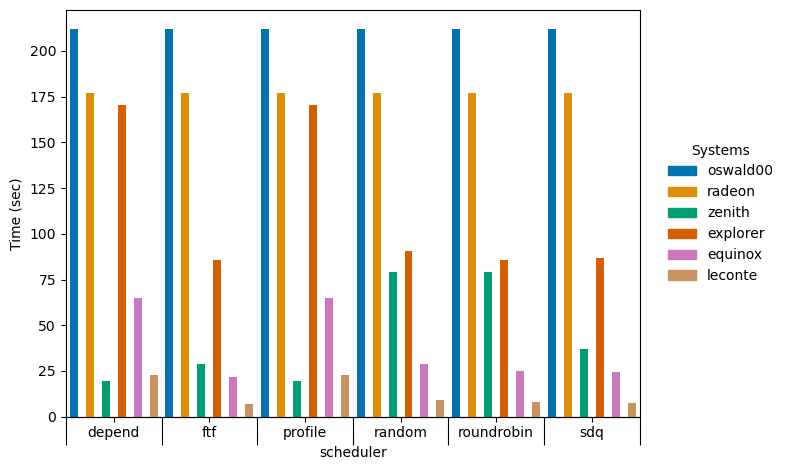

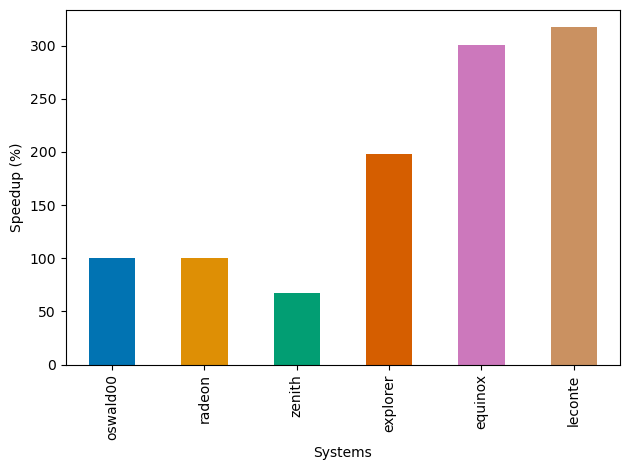

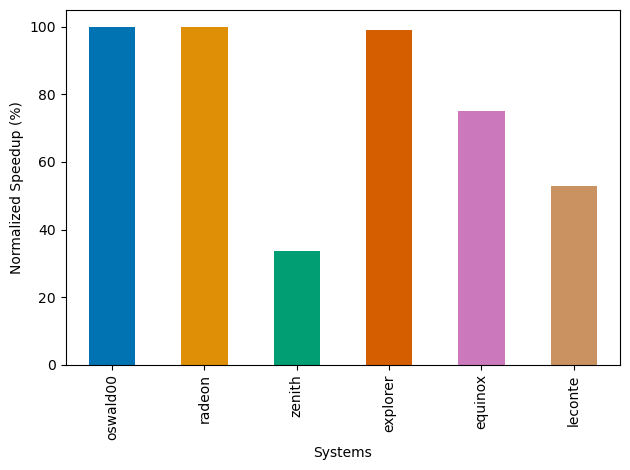

In [320]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.ticker as mticker

systems = ['oswald00','radeon','zenith','explorer','equinox','leconte']
num_gpus= [1 ,1, 2, 2, 4, 6]
gpu_sys_map = dict(zip(systems,num_gpus))

#generate the colour palette for each system
palette = sns.color_palette("colorblind", len(systems))

# map names to colors
cmap = dict(zip(systems, palette))
patches = [Patch(color=v, label=k) for k, v in cmap.items()]

times = pd.DataFrame({'scheduler':[],'secs':[]})

#load the last timestamp (finish) from all systems with all scheduling-policies
for i,s in enumerate(systems):
    files = glob.glob("./wamta_paper/{}-*-time.csv".format(s))
    for f in files:
        cont = pd.read_csv(f)
        row = pd.DataFrame({'scheduler':f.split('-')[1],'secs':max(cont['end']),'system':s, 'num_gpus':gpu_sys_map[s]},index=[s])
        times = pd.concat([times, row])
times.sort_values(['scheduler','num_gpus'],inplace=True)

print(times)

colours = [cmap[s] for s in times.index]

ax = times.plot.bar(x='scheduler',y='secs',color=colours)
ax.set_xticks(np.arange(2.5, len(x), 6), [ax.get_xticklabels()[i].get_text() for i in np.arange(2, len(x), 6)])#reuse old labels but stagger them by half a point
plt.xticks(rotation=0)
plt.tight_layout()
room_sep_ax = ax.secondary_xaxis(location=0)
room_sep_ax.set_xticks(np.arange(-.5,36.5,6),''*6)
room_sep_ax.tick_params('x', length=20)
ax.set_ylabel(r"Time (sec)")
plt.legend(title='Systems', labels=systems, handles=patches, bbox_to_anchor=(1.04, 0.5), loc='center left', borderaxespad=0, frameon=False)
plt.savefig('absolute_comparison.pdf',bbox_inches = 'tight')
plt.show()

#relative performance:
depend_df = times[times['scheduler'] == 'depend']
ftf_df = times[times['scheduler'] == 'ftf']
relative_perf=pd.DataFrame({'perf':(depend_df['secs']/ftf_df['secs'] )*100}) 
ax = relative_perf.plot.bar(y='perf',color=colours,legend=None)
#ax.set_ylabel(r"Speedup $\left( \frac{depend}{ftf} \right) \times 100$")
ax.set_ylabel(r"Speedup (%)")
ax.set_xlabel("Systems")
plt.tight_layout()
plt.savefig('relative_comparison.pdf',bbox_inches = 'tight')
plt.show()

#normalized relative performance:
depend_df = times[times['scheduler'] == 'depend']
ftf_df = times[times['scheduler'] == 'ftf']
normalized_perf=pd.DataFrame({'performance':((depend_df['secs']/ftf_df['secs'] )*100 / ftf_df['num_gpus'])})
ax = normalized_perf.plot.bar(y='performance',color=colours,legend=None)
#ax.set_ylabel(r"Speedup $ \left( \frac{\mathit{depend}}{ftf} \right) \times 100 \div $ # GPUs")
ax.set_ylabel(r"Normalized Speedup (%)")
ax.set_xlabel("Systems")
plt.tight_layout()
plt.savefig('normalized_comparison.pdf',bbox_inches = 'tight')
plt.show()
